## Compare Resistant vs Susceptible MCAV Corals 

#### Installation

In [1]:
install.packages("remotes")
remotes::install_github("vegandevs/vegan")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done




Running `R CMD build`...



* checking for file ‘/tmp/RtmpygP4yN/remotesa41d53fd81666/vegandevs-vegan-28a0320/DESCRIPTION’ ... OK
* preparing ‘vegan’:
* checking DESCRIPTION meta-information ... OK
* cleaning src
* installing the package to process help pages
      -----------------------------------
* installing *source* package ‘vegan’ ...
** using staged installation
** libs
using C compiler: ‘x86_64-conda-linux-gnu-cc (conda-forge gcc 13.2.0-3) 13.2.0’
using Fortran compiler: ‘GNU Fortran (conda-forge gcc 13.2.0-3) 13.2.0’
x86_64-conda-linux-gnu-cc -I"/home/brooke_sienkiewicz_student_uml_edu/.conda/envs/r_env/lib/R/include" -DNDEBUG   -DNDEBUG -D_FORTIFY_SOURCE=2 -O2 -isystem /home/brooke_sienkiewicz_student_uml_edu/.conda/envs/r_env/include -I/home/brooke_sienkiewicz_student_uml_edu/.conda/envs/r_env/include -Wl,-rpath-link,/home/brooke_sienkiewicz_student_uml_edu/.conda/envs/r_env/lib    -fpic  -march=nocona -mtune=haswell -ftree-vectorize -fPIC -fstack-protector-strong -fno-plt -O2 -ffunction-sections -pip

ERROR: Error: Failed to install 'vegan' from GitHub:
  Failed to `R CMD build` package, try `build = FALSE`.


In [ ]:
# Get the current working directory
current_directory <- getwd()
print(paste("Current Working Directory:", current_directory))

In [ ]:
# Set a new working directory
new_directory <- "//project/pi_sarah_gignouxwolfsohn_uml_edu/brooke/mcav_taxonomy/kraken"
setwd(new_directory)

# Check if the working directory has been changed
current_directory <- getwd()
print(paste("New Working Directory:", current_directory))


In [ ]:
install.packages('ecodist')

In [ ]:
install.packages('tidyverse')

In [ ]:
install.packages('ggvegan')

In [ ]:
install.packages('phyloseq')

In [ ]:
if (!require("BiocManager", quietly = TRUE))
    install.packages("BiocManager")

BiocManager::install("phyloseq")

#### Begin Coding

In [4]:
library(tidyverse)
library(vegan)
library(phyloseq)
#library(VennDiagram)
library("DESeq2")

Loading required package: S4Vectors

Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:lubridate’:

    intersect, setdiff, union


The following objects are masked from ‘package:dplyr’:

    combine, intersect, setdiff, union


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which.max, which.min



Attaching package: ‘S4Vectors’


The following objects are masked from ‘package:lubridate’:

    second, second<-


The

In [2]:
# Load otu and taxa table separately 

In [5]:
setwd('/project/pi_sarah_gignouxwolfsohn_uml_edu/brooke/mcav/healthy_2019_mcav/taxonomy')

In [6]:
taxa = read.csv('otu_id_species',header=TRUE)
head(taxa)
dim(taxa)
# taxa is the same for diseased mcavs 

,name,taxonomy_id,taxonomy_lvl
,<chr>,<int>,<chr>
1,Homo sapiens,9606,S
2,Cutibacterium modestum,2559073,S
3,Cutibacterium acnes,1747,S
4,Cutibacterium granulosum,33011,S
5,Cutibacterium avidum,33010,S
6,Cutibacterium equinum,3016342,S


[1] 25487     3

In [9]:
diseased_path='/project/pi_sarah_gignouxwolfsohn_uml_edu/brooke/mcav/diseased_mcav/taxonomy'

In [10]:
d_path=file.path(diseased_path, "otu_id_species")
taxa_diseased = read.csv(d_path,header=TRUE)
head(taxa_diseased)
dim(taxa_diseased)

,name,taxonomy_id,taxonomy_lvl
,<chr>,<int>,<chr>
1,Homo sapiens,9606,S
2,Pseudomonas syringae,317,S
3,Pseudomonas savastanoi,29438,S
4,Pseudomonas amygdali,47877,S
5,Pseudomonas ficuserectae,53410,S
6,Pseudomonas viridiflava,33069,S


[1] 25487     3

In [145]:
# diseased mcav and healthy have the same otu list - so only need to upload one 

In [11]:
# remove taxa level col
taxa$taxonomy_lvl <- NULL 
# change taxa table names
colnames(taxa) <- c("species", "otuid")

In [12]:
# remove duplicated entries
taxa_filter=taxa[!duplicated(taxa$species), ]

In [13]:
dim(taxa_filter)

[1] 25487     2

In [14]:
head(taxa_filter)

,species,otuid
,<chr>,<int>
1,Homo sapiens,9606
2,Cutibacterium modestum,2559073
3,Cutibacterium acnes,1747
4,Cutibacterium granulosum,33011
5,Cutibacterium avidum,33010
6,Cutibacterium equinum,3016342


In [15]:
# make the index the species names 
row.names(taxa_filter) <- taxa_filter$species
taxa_filter$species <- NULL
head(taxa_filter)

,otuid
,<int>
Homo sapiens,9606
Cutibacterium modestum,2559073
Cutibacterium acnes,1747
Cutibacterium granulosum,33011
Cutibacterium avidum,33010
Cutibacterium equinum,3016342


In [16]:
str(taxa_filter)

'data.frame':	25487 obs. of  1 variable:
 $ otuid: int  9606 2559073 1747 33011 33010 3016342 546874 630515 29405 2596828 ...


In [47]:
# convert to character matrix to create phyloseq objects 
taxa_filter$otuid <- as.character(taxa_filter$otuid)
taxonomy <- as.matrix(taxa_filter)

# check structure
str(taxonomy)

 chr [1:25487, 1] "9606" "2559073" "1747" "33011" "33010" "3016342" ...
 - attr(*, "dimnames")=List of 2
  ..$ : chr [1:25487] "Homo sapiens" "Cutibacterium modestum" "Cutibacterium acnes" "Cutibacterium granulosum" ...
  ..$ : chr "otuid"


In [48]:
otu = read.csv('otu_normtable_species',header=TRUE)
head(otu)

,X,X062019_BEL_CBC_T3_8_MCAV,X062019_BEL_CBC_T2_16_MCAV,X062019_BEL_CBC_T1_20_MCAV,X062019_BEL_CBC_T1_24_MCAV,X062019_BEL_CBC_T3_9_MCAV,X062019_BEL_CBC_T3_14_MCAV,X062019_BEL_CBC_T3_1_MCAV,X062019_BEL_CBC_T3_15_MCAV,X062019_BEL_CBC_T1_16_MCAV,X062019_BEL_CBC_T3_16_MCAV,X062019_BEL_CBC_T1_3_MCAV,X062019_BEL_CBC_T2_5_MCAV,X062019_BEL_CBC_T3_6_MCAV
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Cutibacterium modestum,419.40057581,1.2359783,0.0000000,1.541648,2064.2651015,2472.106860,0.152715,0.0000000,0.1327328,42.046456,0.6365703,0.0000000,39288.779376
2,Cutibacterium acnes,30.83715929,2.4719567,1.7779034,12.590129,404.1649146,487.060393,2.596155,8.1847620,0.9291293,177.326357,6.3657026,3.5288224,2468.874565
3,Cutibacterium granulosum,0.29151445,0.0000000,0.1185269,5.652711,12.7201547,6.984871,0.000000,2.5846617,0.1327328,29.249708,0.0000000,0.1102757,43.502032
4,Cutibacterium avidum,0.25349083,1.6479711,0.1185269,8.222125,0.4800058,1.343244,0.000000,4.3077694,0.1327328,18.281068,0.9548554,0.0000000,25.241920
5,Cutibacterium equinum,0.01267454,0.8239856,0.0000000,1.284707,1.4400175,1.074595,0.000000,0.4307769,0.2654655,1.828107,0.0000000,0.0000000,9.130056
6,Microlunatus sagamiharensis,0.16476904,2.0599639,0.4741076,7.194359,1.2000146,1.880542,0.152715,0.4307769,0.7963966,39.304296,0.9548554,0.1102757,1.074124


In [49]:
# rename first col as otu
names(otu)[1] <- "otu"
head(otu)
dim(otu)

,otu,X062019_BEL_CBC_T3_8_MCAV,X062019_BEL_CBC_T2_16_MCAV,X062019_BEL_CBC_T1_20_MCAV,X062019_BEL_CBC_T1_24_MCAV,X062019_BEL_CBC_T3_9_MCAV,X062019_BEL_CBC_T3_14_MCAV,X062019_BEL_CBC_T3_1_MCAV,X062019_BEL_CBC_T3_15_MCAV,X062019_BEL_CBC_T1_16_MCAV,X062019_BEL_CBC_T3_16_MCAV,X062019_BEL_CBC_T1_3_MCAV,X062019_BEL_CBC_T2_5_MCAV,X062019_BEL_CBC_T3_6_MCAV
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Cutibacterium modestum,419.40057581,1.2359783,0.0000000,1.541648,2064.2651015,2472.106860,0.152715,0.0000000,0.1327328,42.046456,0.6365703,0.0000000,39288.779376
2,Cutibacterium acnes,30.83715929,2.4719567,1.7779034,12.590129,404.1649146,487.060393,2.596155,8.1847620,0.9291293,177.326357,6.3657026,3.5288224,2468.874565
3,Cutibacterium granulosum,0.29151445,0.0000000,0.1185269,5.652711,12.7201547,6.984871,0.000000,2.5846617,0.1327328,29.249708,0.0000000,0.1102757,43.502032
4,Cutibacterium avidum,0.25349083,1.6479711,0.1185269,8.222125,0.4800058,1.343244,0.000000,4.3077694,0.1327328,18.281068,0.9548554,0.0000000,25.241920
5,Cutibacterium equinum,0.01267454,0.8239856,0.0000000,1.284707,1.4400175,1.074595,0.000000,0.4307769,0.2654655,1.828107,0.0000000,0.0000000,9.130056
6,Microlunatus sagamiharensis,0.16476904,2.0599639,0.4741076,7.194359,1.2000146,1.880542,0.152715,0.4307769,0.7963966,39.304296,0.9548554,0.1102757,1.074124


[1] 25486    14

In [50]:
# i dont remember what this is for..

#otu=cbind(all$sample_id, all$otuid, all$abundance_normal)
#colnames(otu)=c("Sample", "OTUID", "count")

In [51]:
# or this...

#otu_table=pivot_wider(otu, names_from = Sample, values_from = count)

In [52]:
# remove leading x's from sample names 
names(otu) <- sub("^X", "", names(otu))

In [53]:
otu_table=as.data.frame(otu)
head(otu_table)

,otu,062019_BEL_CBC_T3_8_MCAV,062019_BEL_CBC_T2_16_MCAV,062019_BEL_CBC_T1_20_MCAV,062019_BEL_CBC_T1_24_MCAV,062019_BEL_CBC_T3_9_MCAV,062019_BEL_CBC_T3_14_MCAV,062019_BEL_CBC_T3_1_MCAV,062019_BEL_CBC_T3_15_MCAV,062019_BEL_CBC_T1_16_MCAV,062019_BEL_CBC_T3_16_MCAV,062019_BEL_CBC_T1_3_MCAV,062019_BEL_CBC_T2_5_MCAV,062019_BEL_CBC_T3_6_MCAV
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Cutibacterium modestum,419.40057581,1.2359783,0.0000000,1.541648,2064.2651015,2472.106860,0.152715,0.0000000,0.1327328,42.046456,0.6365703,0.0000000,39288.779376
2,Cutibacterium acnes,30.83715929,2.4719567,1.7779034,12.590129,404.1649146,487.060393,2.596155,8.1847620,0.9291293,177.326357,6.3657026,3.5288224,2468.874565
3,Cutibacterium granulosum,0.29151445,0.0000000,0.1185269,5.652711,12.7201547,6.984871,0.000000,2.5846617,0.1327328,29.249708,0.0000000,0.1102757,43.502032
4,Cutibacterium avidum,0.25349083,1.6479711,0.1185269,8.222125,0.4800058,1.343244,0.000000,4.3077694,0.1327328,18.281068,0.9548554,0.0000000,25.241920
5,Cutibacterium equinum,0.01267454,0.8239856,0.0000000,1.284707,1.4400175,1.074595,0.000000,0.4307769,0.2654655,1.828107,0.0000000,0.0000000,9.130056
6,Microlunatus sagamiharensis,0.16476904,2.0599639,0.4741076,7.194359,1.2000146,1.880542,0.152715,0.4307769,0.7963966,39.304296,0.9548554,0.1102757,1.074124


In [54]:
# Remove the first column (OTUID) and set as row names
#rownames(otu_table) <- otu_table$otu  
#otu_table$otu=NULL

#rownames(otu_table)
#head(otu_table)
#dim(otu_table)

In [55]:
# read in diseased otu table too 
diseased_path='/project/pi_sarah_gignouxwolfsohn_uml_edu/brooke/mcav/diseased_mcav/taxonomy'
d_file='otu_normtable_species'
d_fullfile=file.path(diseased_path,d_file)
otu_d = read.csv(d_fullfile,header=TRUE)
head(otu_d)
dim(otu_d)

,X,X052022_BEL_CBC_T1_70_MCAV,X052022_BEL_CBC_T3_49_MCAV,X052022_BEL_CBC_T3_51_MCAV,X052022_BEL_CBC_T3_60_MCAV,X052022_BEL_CBC_T1_13_MCAV
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Pseudomonas syringae,27990.562936,95.4565571,35.075901,2.036342,27.823882
2,Pseudomonas savastanoi,149.699621,0.8264637,8.094439,0.105784,13.285277
3,Pseudomonas amygdali,63.690384,1.6529274,4.047219,0.171899,2.406390
4,Pseudomonas ficuserectae,2.177449,0.8264637,0.000000,0.039669,1.453861
5,Pseudomonas viridiflava,72.400180,0.8264637,1.349073,0.039669,3.860250
6,Pseudomonas syringae group genomosp. 7,61.512935,7.0249414,1.798764,0.290906,20.003115


[1] 25486     6

In [56]:
# rename first col as otu
names(otu_d)[1] <- "otu"
head(otu_d)

,otu,X052022_BEL_CBC_T1_70_MCAV,X052022_BEL_CBC_T3_49_MCAV,X052022_BEL_CBC_T3_51_MCAV,X052022_BEL_CBC_T3_60_MCAV,X052022_BEL_CBC_T1_13_MCAV
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Pseudomonas syringae,27990.562936,95.4565571,35.075901,2.036342,27.823882
2,Pseudomonas savastanoi,149.699621,0.8264637,8.094439,0.105784,13.285277
3,Pseudomonas amygdali,63.690384,1.6529274,4.047219,0.171899,2.406390
4,Pseudomonas ficuserectae,2.177449,0.8264637,0.000000,0.039669,1.453861
5,Pseudomonas viridiflava,72.400180,0.8264637,1.349073,0.039669,3.860250
6,Pseudomonas syringae group genomosp. 7,61.512935,7.0249414,1.798764,0.290906,20.003115


In [57]:
# remove leading x's from sample names 
names(otu_d) <- sub("^X", "", names(otu_d))

In [58]:
otud_table=as.data.frame(otu_d)
head(otud_table)

,otu,052022_BEL_CBC_T1_70_MCAV,052022_BEL_CBC_T3_49_MCAV,052022_BEL_CBC_T3_51_MCAV,052022_BEL_CBC_T3_60_MCAV,052022_BEL_CBC_T1_13_MCAV
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Pseudomonas syringae,27990.562936,95.4565571,35.075901,2.036342,27.823882
2,Pseudomonas savastanoi,149.699621,0.8264637,8.094439,0.105784,13.285277
3,Pseudomonas amygdali,63.690384,1.6529274,4.047219,0.171899,2.406390
4,Pseudomonas ficuserectae,2.177449,0.8264637,0.000000,0.039669,1.453861
5,Pseudomonas viridiflava,72.400180,0.8264637,1.349073,0.039669,3.860250
6,Pseudomonas syringae group genomosp. 7,61.512935,7.0249414,1.798764,0.290906,20.003115


In [59]:
# Merge otu_table and otud_table
merged_otu_table <- merge(otu_table, otud_table, by = "otu", all = TRUE)
head(merged_otu_table)

,otu,062019_BEL_CBC_T3_8_MCAV,062019_BEL_CBC_T2_16_MCAV,062019_BEL_CBC_T1_20_MCAV,062019_BEL_CBC_T1_24_MCAV,062019_BEL_CBC_T3_9_MCAV,062019_BEL_CBC_T3_14_MCAV,062019_BEL_CBC_T3_1_MCAV,062019_BEL_CBC_T3_15_MCAV,062019_BEL_CBC_T1_16_MCAV,062019_BEL_CBC_T3_16_MCAV,062019_BEL_CBC_T1_3_MCAV,062019_BEL_CBC_T2_5_MCAV,062019_BEL_CBC_T3_6_MCAV,052022_BEL_CBC_T1_70_MCAV,052022_BEL_CBC_T3_49_MCAV,052022_BEL_CBC_T3_51_MCAV,052022_BEL_CBC_T3_60_MCAV,052022_BEL_CBC_T1_13_MCAV
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,'Catharanthus roseus' aster yellows phytoplasma,0.0000000,0.000000,0.0000000,2.312473,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.00000,0.0000000,0.0000000,0.000000,1.088725,0.0000000,0.0000000,0.000000,0.0000000
2,[Acidovorax] ebreus,0.0000000,0.000000,0.4741076,0.000000,2.8800350,1.3432443,0.0000000,0.8615539,0.6636638,48.44483,1.2731405,0.0000000,10.204180,3.266174,0.0000000,0.0000000,0.000000,0.0000000
3,[Bacillus] caldolyticus,0.0000000,0.000000,0.0000000,2.312473,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,15.53891,0.0000000,0.0000000,0.000000,4.899260,0.0000000,0.0000000,0.000000,0.0000000
4,[Brevibacterium] flavum,0.0000000,0.000000,0.0000000,0.000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.00000,0.0000000,0.0000000,0.000000,0.000000,0.0000000,0.0000000,0.000000,0.0000000
5,[Clostridium] colinum,0.1013963,8.651848,0.9482151,3.597180,0.2400029,0.8059466,0.4581449,3.8769925,0.6636638,60.32752,2.5462810,0.4411028,26.316044,33.750460,1.6529274,0.8993821,0.000000,1.7546592
6,[Clostridium] hylemonae,0.1267454,1.235978,0.4741076,3.083297,3.6000438,0.0000000,0.1527150,2.1538847,0.1327328,57.58536,0.9548554,0.0000000,5.370621,43.548981,0.4132318,0.0000000,0.026446,0.5514643


In [60]:
# Remove the first column (OTUID) and set as row names
rownames(merged_otu_table) <- merged_otu_table$otu  
merged_otu_table$otu=NULL

#rownames(otud_table)
head(merged_otu_table)
dim(merged_otu_table)

,062019_BEL_CBC_T3_8_MCAV,062019_BEL_CBC_T2_16_MCAV,062019_BEL_CBC_T1_20_MCAV,062019_BEL_CBC_T1_24_MCAV,062019_BEL_CBC_T3_9_MCAV,062019_BEL_CBC_T3_14_MCAV,062019_BEL_CBC_T3_1_MCAV,062019_BEL_CBC_T3_15_MCAV,062019_BEL_CBC_T1_16_MCAV,062019_BEL_CBC_T3_16_MCAV,062019_BEL_CBC_T1_3_MCAV,062019_BEL_CBC_T2_5_MCAV,062019_BEL_CBC_T3_6_MCAV,052022_BEL_CBC_T1_70_MCAV,052022_BEL_CBC_T3_49_MCAV,052022_BEL_CBC_T3_51_MCAV,052022_BEL_CBC_T3_60_MCAV,052022_BEL_CBC_T1_13_MCAV
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
'Catharanthus roseus' aster yellows phytoplasma,0.0000000,0.000000,0.0000000,2.312473,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.00000,0.0000000,0.0000000,0.000000,1.088725,0.0000000,0.0000000,0.000000,0.0000000
[Acidovorax] ebreus,0.0000000,0.000000,0.4741076,0.000000,2.8800350,1.3432443,0.0000000,0.8615539,0.6636638,48.44483,1.2731405,0.0000000,10.204180,3.266174,0.0000000,0.0000000,0.000000,0.0000000
[Bacillus] caldolyticus,0.0000000,0.000000,0.0000000,2.312473,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,15.53891,0.0000000,0.0000000,0.000000,4.899260,0.0000000,0.0000000,0.000000,0.0000000
[Brevibacterium] flavum,0.0000000,0.000000,0.0000000,0.000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.00000,0.0000000,0.0000000,0.000000,0.000000,0.0000000,0.0000000,0.000000,0.0000000
[Clostridium] colinum,0.1013963,8.651848,0.9482151,3.597180,0.2400029,0.8059466,0.4581449,3.8769925,0.6636638,60.32752,2.5462810,0.4411028,26.316044,33.750460,1.6529274,0.8993821,0.000000,1.7546592
[Clostridium] hylemonae,0.1267454,1.235978,0.4741076,3.083297,3.6000438,0.0000000,0.1527150,2.1538847,0.1327328,57.58536,0.9548554,0.0000000,5.370621,43.548981,0.4132318,0.0000000,0.026446,0.5514643


[1] 25486    18

In [61]:
# sort by most abundant OTUs
otus_sorted <- merged_otu_table[order(rowSums(merged_otu_table), decreasing = TRUE), ]
head(otus_sorted)

,062019_BEL_CBC_T3_8_MCAV,062019_BEL_CBC_T2_16_MCAV,062019_BEL_CBC_T1_20_MCAV,062019_BEL_CBC_T1_24_MCAV,062019_BEL_CBC_T3_9_MCAV,062019_BEL_CBC_T3_14_MCAV,062019_BEL_CBC_T3_1_MCAV,062019_BEL_CBC_T3_15_MCAV,062019_BEL_CBC_T1_16_MCAV,062019_BEL_CBC_T3_16_MCAV,062019_BEL_CBC_T1_3_MCAV,062019_BEL_CBC_T2_5_MCAV,062019_BEL_CBC_T3_6_MCAV,052022_BEL_CBC_T1_70_MCAV,052022_BEL_CBC_T3_49_MCAV,052022_BEL_CBC_T3_51_MCAV,052022_BEL_CBC_T3_60_MCAV,052022_BEL_CBC_T1_13_MCAV
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Photobacterium damselae,5.057142,1113.616485,94.58446,2688.891755,113.04137,196.11367,33.291866,533.3019,87.0726918,66986.40254,321.4679819,17.864663,3739.0265,37943.13810,257.4434420,68.353038,7.127198,38.9033019
Pseudomonas syringae,4.486788,288.394946,31.29110,2263.396796,180.00219,196.65097,13.897063,194.7112,33.1831905,57982.97667,125.0860563,6.285715,3635.3735,27990.56294,95.4565571,35.075901,2.036342,27.8238821
Pseudomonas sp. CIP-10,5.462727,1311.785012,404.29522,963.530252,58.08071,77.37087,1811.963264,501.8551,289.4901536,15841.45927,585.0080701,82.817050,1052.6418,18009.68094,2812.4559650,2042.946394,18.697324,63.2679987
Cutibacterium modestum,419.400576,1.235978,0.00000,1.541648,2064.26510,2472.10686,0.152715,0.0000,0.1327328,42.04646,0.6365703,0.000000,39288.7794,30.48429,0.4132318,0.449691,0.013223,0.2005325
Pedobacter sp. SL55,3.460150,933.987633,83.91704,814.504239,82.32100,133.51849,21.380098,308.4363,58.1369497,19895.28604,251.4452532,8.491229,2472.0969,14187.71353,197.9380557,53.063543,5.342093,17.5967255
Bacillus cereus,1.635016,330.006217,36.50628,992.564630,111.12135,24.44705,87.658400,277.8511,49.7747857,16540.71011,148.3208709,26.355892,327.0708,15693.41953,184.7146365,179.426725,3.556987,63.6690636


In [62]:
# Convert to matrix
otus=as.matrix(otus_sorted)
# Replace NAs with 0
#otus[is.na(otus)] <- 0

head(otus)

,062019_BEL_CBC_T3_8_MCAV,062019_BEL_CBC_T2_16_MCAV,062019_BEL_CBC_T1_20_MCAV,062019_BEL_CBC_T1_24_MCAV,062019_BEL_CBC_T3_9_MCAV,062019_BEL_CBC_T3_14_MCAV,062019_BEL_CBC_T3_1_MCAV,062019_BEL_CBC_T3_15_MCAV,062019_BEL_CBC_T1_16_MCAV,062019_BEL_CBC_T3_16_MCAV,062019_BEL_CBC_T1_3_MCAV,062019_BEL_CBC_T2_5_MCAV,062019_BEL_CBC_T3_6_MCAV,052022_BEL_CBC_T1_70_MCAV,052022_BEL_CBC_T3_49_MCAV,052022_BEL_CBC_T3_51_MCAV,052022_BEL_CBC_T3_60_MCAV,052022_BEL_CBC_T1_13_MCAV
Photobacterium damselae,5.057142,1113.616485,94.58446,2688.891755,113.04137,196.11367,33.291866,533.3019,87.0726918,66986.40254,321.4679819,17.864663,3739.0265,37943.13810,257.4434420,68.353038,7.127198,38.9033019
Pseudomonas syringae,4.486788,288.394946,31.29110,2263.396796,180.00219,196.65097,13.897063,194.7112,33.1831905,57982.97667,125.0860563,6.285715,3635.3735,27990.56294,95.4565571,35.075901,2.036342,27.8238821
Pseudomonas sp. CIP-10,5.462727,1311.785012,404.29522,963.530252,58.08071,77.37087,1811.963264,501.8551,289.4901536,15841.45927,585.0080701,82.817050,1052.6418,18009.68094,2812.4559650,2042.946394,18.697324,63.2679987
Cutibacterium modestum,419.400576,1.235978,0.00000,1.541648,2064.26510,2472.10686,0.152715,0.0000,0.1327328,42.04646,0.6365703,0.000000,39288.7794,30.48429,0.4132318,0.449691,0.013223,0.2005325
Pedobacter sp. SL55,3.460150,933.987633,83.91704,814.504239,82.32100,133.51849,21.380098,308.4363,58.1369497,19895.28604,251.4452532,8.491229,2472.0969,14187.71353,197.9380557,53.063543,5.342093,17.5967255
Bacillus cereus,1.635016,330.006217,36.50628,992.564630,111.12135,24.44705,87.658400,277.8511,49.7747857,16540.71011,148.3208709,26.355892,327.0708,15693.41953,184.7146365,179.426725,3.556987,63.6690636


In [200]:
meta = read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/brooke/metadata/CBC_samples.csv',header=TRUE)

In [201]:
meta$Year=sub('.*(?=.{4}$)', '', meta$Month_year, perl=T)

In [202]:
#meta$SeqID=paste0("T", meta$TransectNum, "_", meta$SampleNum, "_", meta$Year)

In [203]:
head(meta)

,Month_year,Country,Location,CollectionDate,Transect,TransectNum,OldTagNum,NewTagNum,Species,Time_sampled,⋯,Sample_type,SampleNum,Health_status,Sampling_notes,Tubelabel_species,Sample_physical_location,Extraction_physical_location,Date_sequenced,Notes,Year
,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,122022,BEL,CBC,12/5/22,CURLEW,4,,77,OFAV,,⋯,Core_EtOH,2,Healthy,,122022_BEL_CBC_T4_2_OFAV,UML_NARWHAL_R1_B5,UML_NARWHAL_R2_B3,,,2022
2,92023,BEL,CBC,9/25/23,CBC30N,1,,2,PAST,,⋯,Core_RNAlater,171,Healthy,CLP 90%,092023_BEL_CBC_T1_171_PAST,UML_NARWHAL_R1_B10,,,,2023
3,92023,BEL,CBC,9/25/23,CBC30N,1,,21,PAST,,⋯,Core_RNAlater,172,Healthy,No CL,092023_BEL_CBC_T1_172_PAST,UML_NARWHAL_R1_B10,,,,2023
4,92023,BEL,CBC,9/25/23,CBC30N,1,,3,SSID,,⋯,Core_RNAlater,173,Healthy,CLP 80%; DC 20%,092023_BEL_CBC_T1_173_SSID,UML_NARWHAL_R1_B10,,,,2023
5,92023,BEL,CBC,9/25/23,CBC30N,1,,24,MCAV,,⋯,Core_RNAlater,174,Healthy,CLP 10%,092023_BEL_CBC_T1_174_MCAV,UML_NARWHAL_R1_B10,,,,2023
6,92023,BEL,CBC,9/25/23,CBC30N,1,,13,PAST,,⋯,Core_RNAlater,175,Healthy,No CL,092023_BEL_CBC_T1_175_PAST,UML_NARWHAL_R1_B10,,,,2023


In [204]:
meta[(meta$Tubelabel_species=="062019_BEL_CBC_T1_3_MCAV"),]

,Month_year,Country,Location,CollectionDate,Transect,TransectNum,OldTagNum,NewTagNum,Species,Time_sampled,⋯,Sample_type,SampleNum,Health_status,Sampling_notes,Tubelabel_species,Sample_physical_location,Extraction_physical_location,Date_sequenced,Notes,Year
,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1112,62019,BEL,CBC,6/21/19,CBC30N,1,355,355,MCAV,,⋯,Core_EtOH,3,Healthy,,062019_BEL_CBC_T1_3_MCAV,UML_NARWHAL_R1_B1,DNA_extracted,9/11/20,,2019
1113,62019,BEL,CBC,6/21/19,CBC30N,1,355,355,MCAV,,⋯,Syringe,3,Healthy,,062019_BEL_CBC_T1_3_MCAV,SERC,,,,2019


In [213]:
colony=read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/brooke/metadata/CBC_ColonyData.csv',header=TRUE)

In [214]:
# replace newtagnum with oldtagnum if there's na 
colony$NewTagNum <- ifelse(is.na(colony$NewTagNum), colony$OldTagNum, colony$NewTagNum)

In [215]:
# filter for mcavs only 
colony<-colony[colony$Species=="MCAV",]

In [216]:
# add ID col to colony and meta:
colony$tagID<-paste0("T", colony$TransectNum, "_", colony$NewTagNum)
meta$tagID<-paste0("T", meta$TransectNum, "_", meta$NewTagNum)

In [217]:
sample_colony=merge(meta, colony, by="tagID")
sample_colony

tagID,Month_year,Country,Location,CollectionDate,Transect.x,TransectNum.x,OldTagNum.x,NewTagNum.x,Species.x,⋯,X112023_Percentage,X122023_Condition,X122023_Percentage,X012024_Condition,X012024_Percentage,X022024_Condition,X022024_Percentage,X042024_Condition,X042024_Percentage,COLONIES_TO_LOOK_AT
<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
T1_14,62019,BEL,CBC,6/24/19,CBC30N,1,381,14,MCAV,⋯,,Dead,,Dead,,Dead,,,,
T1_14,52022,BEL,CBC,5/21/22,CBC30N,1,381,14,MCAV,⋯,,Dead,,Dead,,Dead,,,,
T1_14,62019,BEL,CBC,6/24/19,CBC30N,1,381,14,MCAV,⋯,,Dead,,Dead,,Dead,,,,
T1_14,52022,BEL,CBC,5/21/22,CBC30N,1,381,14,MCAV,⋯,,Dead,,Dead,,Dead,,,,
T1_14,52022,BEL,CBC,5/21/22,CBC30N,1,381,14,MCAV,⋯,,Dead,,Dead,,Dead,,,,
T1_14,62019,BEL,CBC,6/24/19,CBC30N,1,381,14,MCAV,⋯,,Dead,,Dead,,Dead,,,,
T1_14,52022,BEL,CBC,5/21/22,CBC30N,1,381,14,MCAV,⋯,,Dead,,Dead,,Dead,,,,
T1_15,62019,BEL,CBC,6/26/19,CBC30N,1,359,15,MCAV,⋯,,Dead,,Dead,,Dead,,,,
T1_15,62019,BEL,CBC,6/26/19,CBC30N,1,359,15,MCAV,⋯,,Dead,,Dead,,Dead,,,,


In [218]:
sample_colony=sample_colony[sample_colony$Sample_type=="Core_EtOH",]
#sample_colony[sample_colony$SeqID=="T1_14_2019",]

In [219]:
sample_colony

,tagID,Month_year,Country,Location,CollectionDate,Transect.x,TransectNum.x,OldTagNum.x,NewTagNum.x,Species.x,⋯,X112023_Percentage,X122023_Condition,X122023_Percentage,X012024_Condition,X012024_Percentage,X022024_Condition,X022024_Percentage,X042024_Condition,X042024_Percentage,COLONIES_TO_LOOK_AT
,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
3,T1_14,62019,BEL,CBC,6/24/19,CBC30N,1,381,14,MCAV,⋯,,Dead,,Dead,,Dead,,,,
5,T1_14,52022,BEL,CBC,5/21/22,CBC30N,1,381,14,MCAV,⋯,,Dead,,Dead,,Dead,,,,
7,T1_14,52022,BEL,CBC,5/21/22,CBC30N,1,381,14,MCAV,⋯,,Dead,,Dead,,Dead,,,,
8,T1_15,62019,BEL,CBC,6/26/19,CBC30N,1,359,15,MCAV,⋯,,Dead,,Dead,,Dead,,,,
12,T1_15,52022,BEL,CBC,5/21/22,CBC30N,1,359,15,MCAV,⋯,,Dead,,Dead,,Dead,,,,
16,T1_15,52022,BEL,CBC,5/21/22,CBC30N,1,359,15,MCAV,⋯,,Dead,,Dead,,Dead,,,,
25,T1_24,122022,BEL,CBC,12/2/22,CBC30N,1,,24,MCAV,⋯,100%,Healthy,,Healthy,,Healthy,,,,
30,T1_24,52022,BEL,CBC,5/25/22,CBC30N,1,24,24,MCAV,⋯,100%,Healthy,,Healthy,,Healthy,,,,
44,T1_329,62019,BEL,CBC,6/21/19,CBC30N,1,329,329,MCAV,⋯,,Dead,,Dead,,Dead,,,,


In [148]:
# remove duplicates (based on error from code below)
#sample_colony=sample_colony[!sample_colony$SeqID=="T4_3_2022",]
#sample_colony=sample_colony[!sample_colony$SeqID=="T4_4_2022",]

In [220]:
# make row names match sample IDs (tubelabels)
rownames(sample_colony)=sample_colony$Tubelabel_species
# label colonies as healthy or resistant
sample_colony$RS=ifelse(sample_colony$Date_DocumentedDisease=="Healthy", "Resistant", "Susceptible")
head(sample_colony)

,tagID,Month_year,Country,Location,CollectionDate,Transect.x,TransectNum.x,OldTagNum.x,NewTagNum.x,Species.x,⋯,X122023_Condition,X122023_Percentage,X012024_Condition,X012024_Percentage,X022024_Condition,X022024_Percentage,X042024_Condition,X042024_Percentage,COLONIES_TO_LOOK_AT,RS
,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
062019_BEL_CBC_T1_17_MCAV,T1_14,62019,BEL,CBC,6/24/19,CBC30N,1,381,14,MCAV,⋯,Dead,,Dead,,Dead,,,,,Susceptible
052022_BEL_CBC_T1_39_MCAV,T1_14,52022,BEL,CBC,5/21/22,CBC30N,1,381,14,MCAV,⋯,Dead,,Dead,,Dead,,,,,Susceptible
052022_BEL_CBC_T1_60_MCAV,T1_14,52022,BEL,CBC,5/21/22,CBC30N,1,381,14,MCAV,⋯,Dead,,Dead,,Dead,,,,,Susceptible
062019_BEL_CBC_T1_24_MCAV,T1_15,62019,BEL,CBC,6/26/19,CBC30N,1,359,15,MCAV,⋯,Dead,,Dead,,Dead,,,,,Susceptible
052022_BEL_CBC_T1_70_MCAV,T1_15,52022,BEL,CBC,5/21/22,CBC30N,1,359,15,MCAV,⋯,Dead,,Dead,,Dead,,,,,Susceptible
052022_BEL_CBC_T1_40_MCAV,T1_15,52022,BEL,CBC,5/21/22,CBC30N,1,359,15,MCAV,⋯,Dead,,Dead,,Dead,,,,,Susceptible


In [221]:
sample_colony["062019_BEL_CBC_T1_3_MCAV",]

,tagID,Month_year,Country,Location,CollectionDate,Transect.x,TransectNum.x,OldTagNum.x,NewTagNum.x,Species.x,⋯,X122023_Condition,X122023_Percentage,X012024_Condition,X012024_Percentage,X022024_Condition,X022024_Percentage,X042024_Condition,X042024_Percentage,COLONIES_TO_LOOK_AT,RS
,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
062019_BEL_CBC_T1_3_MCAV,T1_355,62019,BEL,CBC,6/21/19,CBC30N,1,355,355,MCAV,⋯,Dead,,Dead,,Dead,,,,,Susceptible


In [222]:
head(otus)

,062019_BEL_CBC_T3_8_MCAV,062019_BEL_CBC_T2_16_MCAV,062019_BEL_CBC_T1_20_MCAV,062019_BEL_CBC_T1_24_MCAV,062019_BEL_CBC_T3_9_MCAV,062019_BEL_CBC_T3_14_MCAV,062019_BEL_CBC_T3_1_MCAV,062019_BEL_CBC_T3_15_MCAV,062019_BEL_CBC_T1_16_MCAV,062019_BEL_CBC_T3_16_MCAV,062019_BEL_CBC_T1_3_MCAV,062019_BEL_CBC_T2_5_MCAV,062019_BEL_CBC_T3_6_MCAV,052022_BEL_CBC_T1_70_MCAV,052022_BEL_CBC_T3_49_MCAV,052022_BEL_CBC_T3_51_MCAV,052022_BEL_CBC_T3_60_MCAV,052022_BEL_CBC_T1_13_MCAV
Photobacterium damselae,5.057142,1113.616485,94.58446,2688.891755,113.04137,196.11367,33.291866,533.3019,87.0726918,66986.40254,321.4679819,17.864663,3739.0265,37943.13810,257.4434420,68.353038,7.127198,38.9033019
Pseudomonas syringae,4.486788,288.394946,31.29110,2263.396796,180.00219,196.65097,13.897063,194.7112,33.1831905,57982.97667,125.0860563,6.285715,3635.3735,27990.56294,95.4565571,35.075901,2.036342,27.8238821
Pseudomonas sp. CIP-10,5.462727,1311.785012,404.29522,963.530252,58.08071,77.37087,1811.963264,501.8551,289.4901536,15841.45927,585.0080701,82.817050,1052.6418,18009.68094,2812.4559650,2042.946394,18.697324,63.2679987
Cutibacterium modestum,419.400576,1.235978,0.00000,1.541648,2064.26510,2472.10686,0.152715,0.0000,0.1327328,42.04646,0.6365703,0.000000,39288.7794,30.48429,0.4132318,0.449691,0.013223,0.2005325
Pedobacter sp. SL55,3.460150,933.987633,83.91704,814.504239,82.32100,133.51849,21.380098,308.4363,58.1369497,19895.28604,251.4452532,8.491229,2472.0969,14187.71353,197.9380557,53.063543,5.342093,17.5967255
Bacillus cereus,1.635016,330.006217,36.50628,992.564630,111.12135,24.44705,87.658400,277.8511,49.7747857,16540.71011,148.3208709,26.355892,327.0708,15693.41953,184.7146365,179.426725,3.556987,63.6690636


In [223]:
# Extract sample IDs (column names) from otus
sample_IDs <- colnames(otus)

# Filter sample_colony to find rows where RS is NA and the sample ID is in sample_IDs
na_RS <- sample_colony[is.na(sample_colony$RS) & rownames(sample_colony) %in% sample_IDs,]

In [227]:
# Display NA result
columns_show <- c("X062019_Condition","X052022_Condition",'X122022_Condition','Date_DocumentedDisease','Date_DocumentedMortality','RS')
na_RS[,columns_show]

,X062019_Condition,X052022_Condition,X122022_Condition,Date_DocumentedDisease,Date_DocumentedMortality,RS
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
062019_BEL_CBC_T3_6_MCAV,Healthy,Dead,Dead,NA,5/20/22,NA


In [228]:
# change NA in RS in sample to susceptible 
sample_colony["062019_BEL_CBC_T3_6_MCAV","RS"]<-"Susceptible"

In [324]:
# view meta for these mcav samples
mcav_samples<-sample_colony[sample_IDs,]
mcav_samples

,tagID,Month_year,Country,Location,CollectionDate,Transect.x,TransectNum.x,OldTagNum.x,NewTagNum.x,Species.x,⋯,X012024_Percentage,X022024_Condition,X022024_Percentage,X042024_Condition,X042024_Percentage,COLONIES_TO_LOOK_AT,RS,Date,Transect,SampleID
,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<date>,<chr>,<fct>
062019_BEL_CBC_T3_8_MCAV,T3_14,62019,BEL,CBC,6/23/19,Lagoon,3,369,14,MCAV,⋯,,Healthy,,,,,Resistant,NA,3,062019_BEL_CBC_T3_8_MCAV
062019_BEL_CBC_T2_16_MCAV,T2_60,62019,BEL,CBC,6/22/19,SR30N,2,305,60,MCAV,⋯,,Healthy,,,,,Resistant,NA,2,062019_BEL_CBC_T2_16_MCAV
062019_BEL_CBC_T1_20_MCAV,T1_7,62019,BEL,CBC,6/24/19,CBC30N,1,383,7,MCAV,⋯,,Healthy,,,,,Resistant,NA,1,062019_BEL_CBC_T1_20_MCAV
062019_BEL_CBC_T1_24_MCAV,T1_15,62019,BEL,CBC,6/26/19,CBC30N,1,359,15,MCAV,⋯,,Dead,,,,,Susceptible,NA,1,062019_BEL_CBC_T1_24_MCAV
062019_BEL_CBC_T3_9_MCAV,T3_15,62019,BEL,CBC,6/23/19,Lagoon,3,379,15,MCAV,⋯,,Dead,,,,,Susceptible,NA,3,062019_BEL_CBC_T3_9_MCAV
062019_BEL_CBC_T3_14_MCAV,T3_17,62019,BEL,CBC,6/23/19,Lagoon,3,301,17,MCAV,⋯,,Dead,,,,,Susceptible,NA,3,062019_BEL_CBC_T3_14_MCAV
062019_BEL_CBC_T3_1_MCAV,T3_2,62019,BEL,CBC,6/23/19,Lagoon,3,327,2,MCAV,⋯,10%,Diseased,,,,,Susceptible,NA,3,062019_BEL_CBC_T3_1_MCAV
062019_BEL_CBC_T3_15_MCAV,T3_22,62019,BEL,CBC,6/23/19,Lagoon,3,363,22,MCAV,⋯,,Dead,,,,,Susceptible,NA,3,062019_BEL_CBC_T3_15_MCAV
062019_BEL_CBC_T1_16_MCAV,T1_8,62019,BEL,CBC,6/24/19,CBC30N,1,390,8,MCAV,⋯,,Dead,,,,,Susceptible,NA,1,062019_BEL_CBC_T1_16_MCAV


In [327]:
# view samples that come from the same coral 
duplicate_tagIDs <- mcav_samples$tagID[duplicated(mcav_samples$tagID)]

# Subset rows with duplicate tagIDs
duplicate_samples <- mcav_samples[mcav_samples$tagID %in% duplicate_tagIDs, ]

# Sort duplicate_samples by tagID
sorted_duplicate_samples <- duplicate_samples %>% arrange(tagID)

# View the result
sorted_duplicate_samples


,tagID,Month_year,Country,Location,CollectionDate,Transect.x,TransectNum.x,OldTagNum.x,NewTagNum.x,Species.x,⋯,X012024_Percentage,X022024_Condition,X022024_Percentage,X042024_Condition,X042024_Percentage,COLONIES_TO_LOOK_AT,RS,Date,Transect,SampleID
,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<date>,<chr>,<fct>
062019_BEL_CBC_T1_24_MCAV,T1_15,62019,BEL,CBC,6/26/19,CBC30N,1,359,15,MCAV,⋯,,Dead,,,,,Susceptible,NA,1,062019_BEL_CBC_T1_24_MCAV
052022_BEL_CBC_T1_70_MCAV,T1_15,52022,BEL,CBC,5/21/22,CBC30N,1,359,15,MCAV,⋯,,Dead,,,,,Susceptible,NA,1,052022_BEL_CBC_T1_70_MCAV
062019_BEL_CBC_T1_16_MCAV,T1_8,62019,BEL,CBC,6/24/19,CBC30N,1,390,8,MCAV,⋯,,Dead,,,,,Susceptible,NA,1,062019_BEL_CBC_T1_16_MCAV
052022_BEL_CBC_T1_13_MCAV,T1_8,52022,BEL,CBC,5/21/22,CBC30N,1,390,8,MCAV,⋯,,Dead,,,,,Susceptible,NA,1,052022_BEL_CBC_T1_13_MCAV
062019_BEL_CBC_T3_9_MCAV,T3_15,62019,BEL,CBC,6/23/19,Lagoon,3,379,15,MCAV,⋯,,Dead,,,,,Susceptible,NA,3,062019_BEL_CBC_T3_9_MCAV
052022_BEL_CBC_T3_49_MCAV,T3_15,52022,BEL,CBC,5/20/22,Lagoon,3,379,15,MCAV,⋯,,Dead,,,,,Susceptible,NA,3,052022_BEL_CBC_T3_49_MCAV
062019_BEL_CBC_T3_14_MCAV,T3_17,62019,BEL,CBC,6/23/19,Lagoon,3,301,17,MCAV,⋯,,Dead,,,,,Susceptible,NA,3,062019_BEL_CBC_T3_14_MCAV
052022_BEL_CBC_T3_51_MCAV,T3_17,52022,BEL,CBC,5/20/22,Lagoon,3,301,17,MCAV,⋯,,Dead,,,,,Susceptible,NA,3,052022_BEL_CBC_T3_51_MCAV
062019_BEL_CBC_T3_15_MCAV,T3_22,62019,BEL,CBC,6/23/19,Lagoon,3,363,22,MCAV,⋯,,Dead,,,,,Susceptible,NA,3,062019_BEL_CBC_T3_15_MCAV


In [330]:
colnames(sorted_duplicate_samples)

[1] "tagID"                        "Month_year"                  
 [3] "Country"                      "Location"                    
 [5] "CollectionDate"               "Transect.x"                  
 [7] "TransectNum.x"                "OldTagNum.x"                 
 [9] "NewTagNum.x"                  "Species.x"                   
[11] "Time_sampled"                 "Time_processed"              
[13] "Sample_type"                  "SampleNum"                   
[15] "Health_status"                "Sampling_notes"              
[17] "Tubelabel_species"            "Sample_physical_location"    
[19] "Extraction_physical_location" "Date_sequenced"              
[21] "Notes"                        "Year"                        
[23] "X"                            "Date_InitialTag"             
[25] "Transect.y"                   "TransectNum.y"               
[27] "OldTagNum.y"                  "NewTagNum.y"                 
[29] "Species.y"                    "Meter"                       
[31] "Meters_90"                    "Direction"                   
[33] "Size_Class"                   "Notes_June_2019"             
[35] "MaxDiameter"                  "Height"                      
[37] "Date_DocumentedDisease"       "Date_DocumentedMortality"    
[39] "Notes_May2022"                "Sept_2023"                   
[41] "Nov_2023"                     "Dec_2023"                    
[43] "Jan_2024"                     "Feb_2024"                    
[45] "April_2024"                   "X062019_Condition"           
[47] "X062019_Percentage"           "X052022_Condition"           
[49] "X122022_Condition"            "X052023_Condition"           
[51] "X092023_Condition"            "X092023_Percentage"          
[53] "X112023_Condition"            "X112023_Percentage"          
[55] "X122023_Condition"            "X122023_Percentage"          
[57] "X012024_Condition"            "X012024_Percentage"          
[59] "X022024_Condition"            "X022024_Percentage"          
[61] "X042024_Condition"            "X042024_Percentage"          
[63] "COLONIES_TO_LOOK_AT"          "RS"                          
[65] "Date"                         "Transect"                    
[67] "SampleID"

In [333]:
sorted_duplicate_samples[,"Health_status"]

[1] "Healthy"         "Diseased_Tissue" "Healthy"         "Diseased_Tissue"
 [5] "Healthy"         "Diseased_Tissue" "Healthy"         "Diseased_Tissue"
 [9] "Healthy"         "Diseased_Tissue"

In [302]:
# Group by tagID and count the number of samples for each tagID
tag_counts <- sample_colony[sample_IDs,] %>%
  group_by(tagID) %>%
  summarize(sample_count = n())

# Filter to find tagIDs with more than one sample
multiple_samples <- tag_counts %>%
  filter(sample_count > 1)

# Extract the tagIDs with more than one sample
tags_with_multiple_samples <- multiple_samples$tagID

# Filter the original data frame to show rows with these tagIDs
samples_from_same_colony <- sample_colony %>%
  filter(tagID %in% tags_with_multiple_samples)

# View the result
samples_from_same_colony %>%
  arrange(tagID)


,tagID,Month_year,Country,Location,CollectionDate,Transect.x,TransectNum.x,OldTagNum.x,NewTagNum.x,Species.x,⋯,X012024_Percentage,X022024_Condition,X022024_Percentage,X042024_Condition,X042024_Percentage,COLONIES_TO_LOOK_AT,RS,Date,Transect,SampleID
,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<date>,<chr>,<fct>
052022_BEL_CBC_T1_70_MCAV,T1_15,52022,BEL,CBC,5/21/22,CBC30N,1,359,15,MCAV,⋯,,Dead,,,,,Susceptible,NA,1,052022_BEL_CBC_T1_70_MCAV
052022_BEL_CBC_T1_40_MCAV,T1_15,52022,BEL,CBC,5/21/22,CBC30N,1,359,15,MCAV,⋯,,Dead,,,,,Susceptible,NA,1,052022_BEL_CBC_T1_40_MCAV
062019_BEL_CBC_T1_24_MCAV,T1_15,62019,BEL,CBC,6/26/19,CBC30N,1,359,15,MCAV,⋯,,Dead,,,,,Susceptible,NA,1,062019_BEL_CBC_T1_24_MCAV
122022_BEL_CBC_T1_144_MCAV,T1_8,122022,BEL,CBC,12/2/22,CBC30N,1,,8,MCAV,⋯,,Dead,,,,,Susceptible,NA,1,122022_BEL_CBC_T1_144_MCAV
052022_BEL_CBC_T1_13_MCAV,T1_8,52022,BEL,CBC,5/21/22,CBC30N,1,390,8,MCAV,⋯,,Dead,,,,,Susceptible,NA,1,052022_BEL_CBC_T1_13_MCAV
052022_BEL_CBC_T1_12_MCAV,T1_8,52022,BEL,CBC,5/21/22,CBC30N,1,390,8,MCAV,⋯,,Dead,,,,,Susceptible,NA,1,052022_BEL_CBC_T1_12_MCAV
062019_BEL_CBC_T1_16_MCAV,T1_8,62019,BEL,CBC,6/24/19,CBC30N,1,390,8,MCAV,⋯,,Dead,,,,,Susceptible,NA,1,062019_BEL_CBC_T1_16_MCAV
122022_BEL_CBC_T3_132_MCAV,T3_15,122022,BEL,CBC,12/3/22,Lagoon,3,,15,MCAV,⋯,,Dead,,,,,Susceptible,NA,3,122022_BEL_CBC_T3_132_MCAV
122022_BEL_CBC_T3_133_MCAV,T3_15,122022,BEL,CBC,12/3/22,Lagoon,3,,15,MCAV,⋯,,Dead,,,,,Susceptible,NA,3,122022_BEL_CBC_T3_133_MCAV


In [269]:
# I dont rly think this code worked..
# Arrange the data frame by Date and Transect
# Convert row names to a column
sample_colony$SampleID <- rownames(sample_colony)

# Extract date and T#
sample_colony <- sample_colony %>%
  mutate(Date = sub("_.*", "", SampleID),
         Transect = sub(".*_T(\\d+)_.*", "\\1", SampleID))

# Convert Date to actual Date type
sample_colony <- sample_colony %>%
  mutate(Date = as.Date(Date, format = "%m/%Y"))

# Arrange the data frame by Date and Transect
sample_colony <- sample_colony %>%
  arrange(Date, Transect)

# Create an ordered factor for SampleID
sample_colony$SampleID <- factor(sample_colony$SampleID, levels = sample_colony$SampleID)

# Save the sorted row names
sorted_sample_ids <- rownames(sample_colony)

# Reorder the original data frame using the sorted row names
sample_colony <- sample_colony[sorted_sample_ids, ]

In [231]:
dim(taxa_filter)

[1] 25487     1

In [232]:
dim(otus)

[1] 25486    18

In [233]:
head(otus)

,062019_BEL_CBC_T3_8_MCAV,062019_BEL_CBC_T2_16_MCAV,062019_BEL_CBC_T1_20_MCAV,062019_BEL_CBC_T1_24_MCAV,062019_BEL_CBC_T3_9_MCAV,062019_BEL_CBC_T3_14_MCAV,062019_BEL_CBC_T3_1_MCAV,062019_BEL_CBC_T3_15_MCAV,062019_BEL_CBC_T1_16_MCAV,062019_BEL_CBC_T3_16_MCAV,062019_BEL_CBC_T1_3_MCAV,062019_BEL_CBC_T2_5_MCAV,062019_BEL_CBC_T3_6_MCAV,052022_BEL_CBC_T1_70_MCAV,052022_BEL_CBC_T3_49_MCAV,052022_BEL_CBC_T3_51_MCAV,052022_BEL_CBC_T3_60_MCAV,052022_BEL_CBC_T1_13_MCAV
Photobacterium damselae,5.057142,1113.616485,94.58446,2688.891755,113.04137,196.11367,33.291866,533.3019,87.0726918,66986.40254,321.4679819,17.864663,3739.0265,37943.13810,257.4434420,68.353038,7.127198,38.9033019
Pseudomonas syringae,4.486788,288.394946,31.29110,2263.396796,180.00219,196.65097,13.897063,194.7112,33.1831905,57982.97667,125.0860563,6.285715,3635.3735,27990.56294,95.4565571,35.075901,2.036342,27.8238821
Pseudomonas sp. CIP-10,5.462727,1311.785012,404.29522,963.530252,58.08071,77.37087,1811.963264,501.8551,289.4901536,15841.45927,585.0080701,82.817050,1052.6418,18009.68094,2812.4559650,2042.946394,18.697324,63.2679987
Cutibacterium modestum,419.400576,1.235978,0.00000,1.541648,2064.26510,2472.10686,0.152715,0.0000,0.1327328,42.04646,0.6365703,0.000000,39288.7794,30.48429,0.4132318,0.449691,0.013223,0.2005325
Pedobacter sp. SL55,3.460150,933.987633,83.91704,814.504239,82.32100,133.51849,21.380098,308.4363,58.1369497,19895.28604,251.4452532,8.491229,2472.0969,14187.71353,197.9380557,53.063543,5.342093,17.5967255
Bacillus cereus,1.635016,330.006217,36.50628,992.564630,111.12135,24.44705,87.658400,277.8511,49.7747857,16540.71011,148.3208709,26.355892,327.0708,15693.41953,184.7146365,179.426725,3.556987,63.6690636


In [328]:
SAMP_MCAV = sample_data(sorted_duplicate_samples)

In [270]:
# create phyloseq objects 
OTU = otu_table((otus), taxa_are_rows = TRUE)
TAX <- tax_table(taxonomy)
SAMP=sample_data(sample_colony)

In [178]:
# check otu names match 
#taxa_names(OTU)

In [179]:
# check otu names match 
#taxa_names(TAX)

In [271]:
# Create phyloseq object
Corals = phyloseq(OTU, SAMP)
Corals

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 25486 taxa and 18 samples ]
sample_data() Sample Data:       [ 18 samples by 67 sample variables ]

In [329]:
Corals_match = phyloseq(OTU, SAMP_MCAV)

In [272]:
Corals.ord <- ordinate(Corals, "NMDS", "bray", trymax=1000)

Square root transformation
Wisconsin double standardization
Run 0 stress 0.0895023 
Run 1 stress 0.1032795 
Run 2 stress 0.06995278 
... New best solution
... Procrustes: rmse 0.0606233  max resid 0.1699428 
Run 3 stress 0.09991544 
Run 4 stress 0.1032368 
Run 5 stress 0.1039245 
Run 6 stress 0.06995294 
... Procrustes: rmse 0.0001964308  max resid 0.0006006275 
... Similar to previous best
Run 7 stress 0.1049434 
Run 8 stress 0.0895027 
Run 9 stress 0.1049439 
Run 10 stress 0.08950274 
Run 11 stress 0.06995296 
... Procrustes: rmse 0.0002106188  max resid 0.000642432 
... Similar to previous best
Run 12 stress 0.06995289 
... Procrustes: rmse 0.0002006535  max resid 0.000620057 
... Similar to previous best
Run 13 stress 0.1059036 
Run 14 stress 0.371919 
Run 15 stress 0.1049435 
Run 16 stress 0.08950277 
Run 17 stress 0.1011113 
Run 18 stress 0.0699529 
... Procrustes: rmse 0.0001735166  max resid 0.0005263822 
... Similar to previous best
Run 19 stress 0.1032353 
Run 20 stress 0.069

In [237]:
options(repr.plot.width=20, repr.plot.height=15)

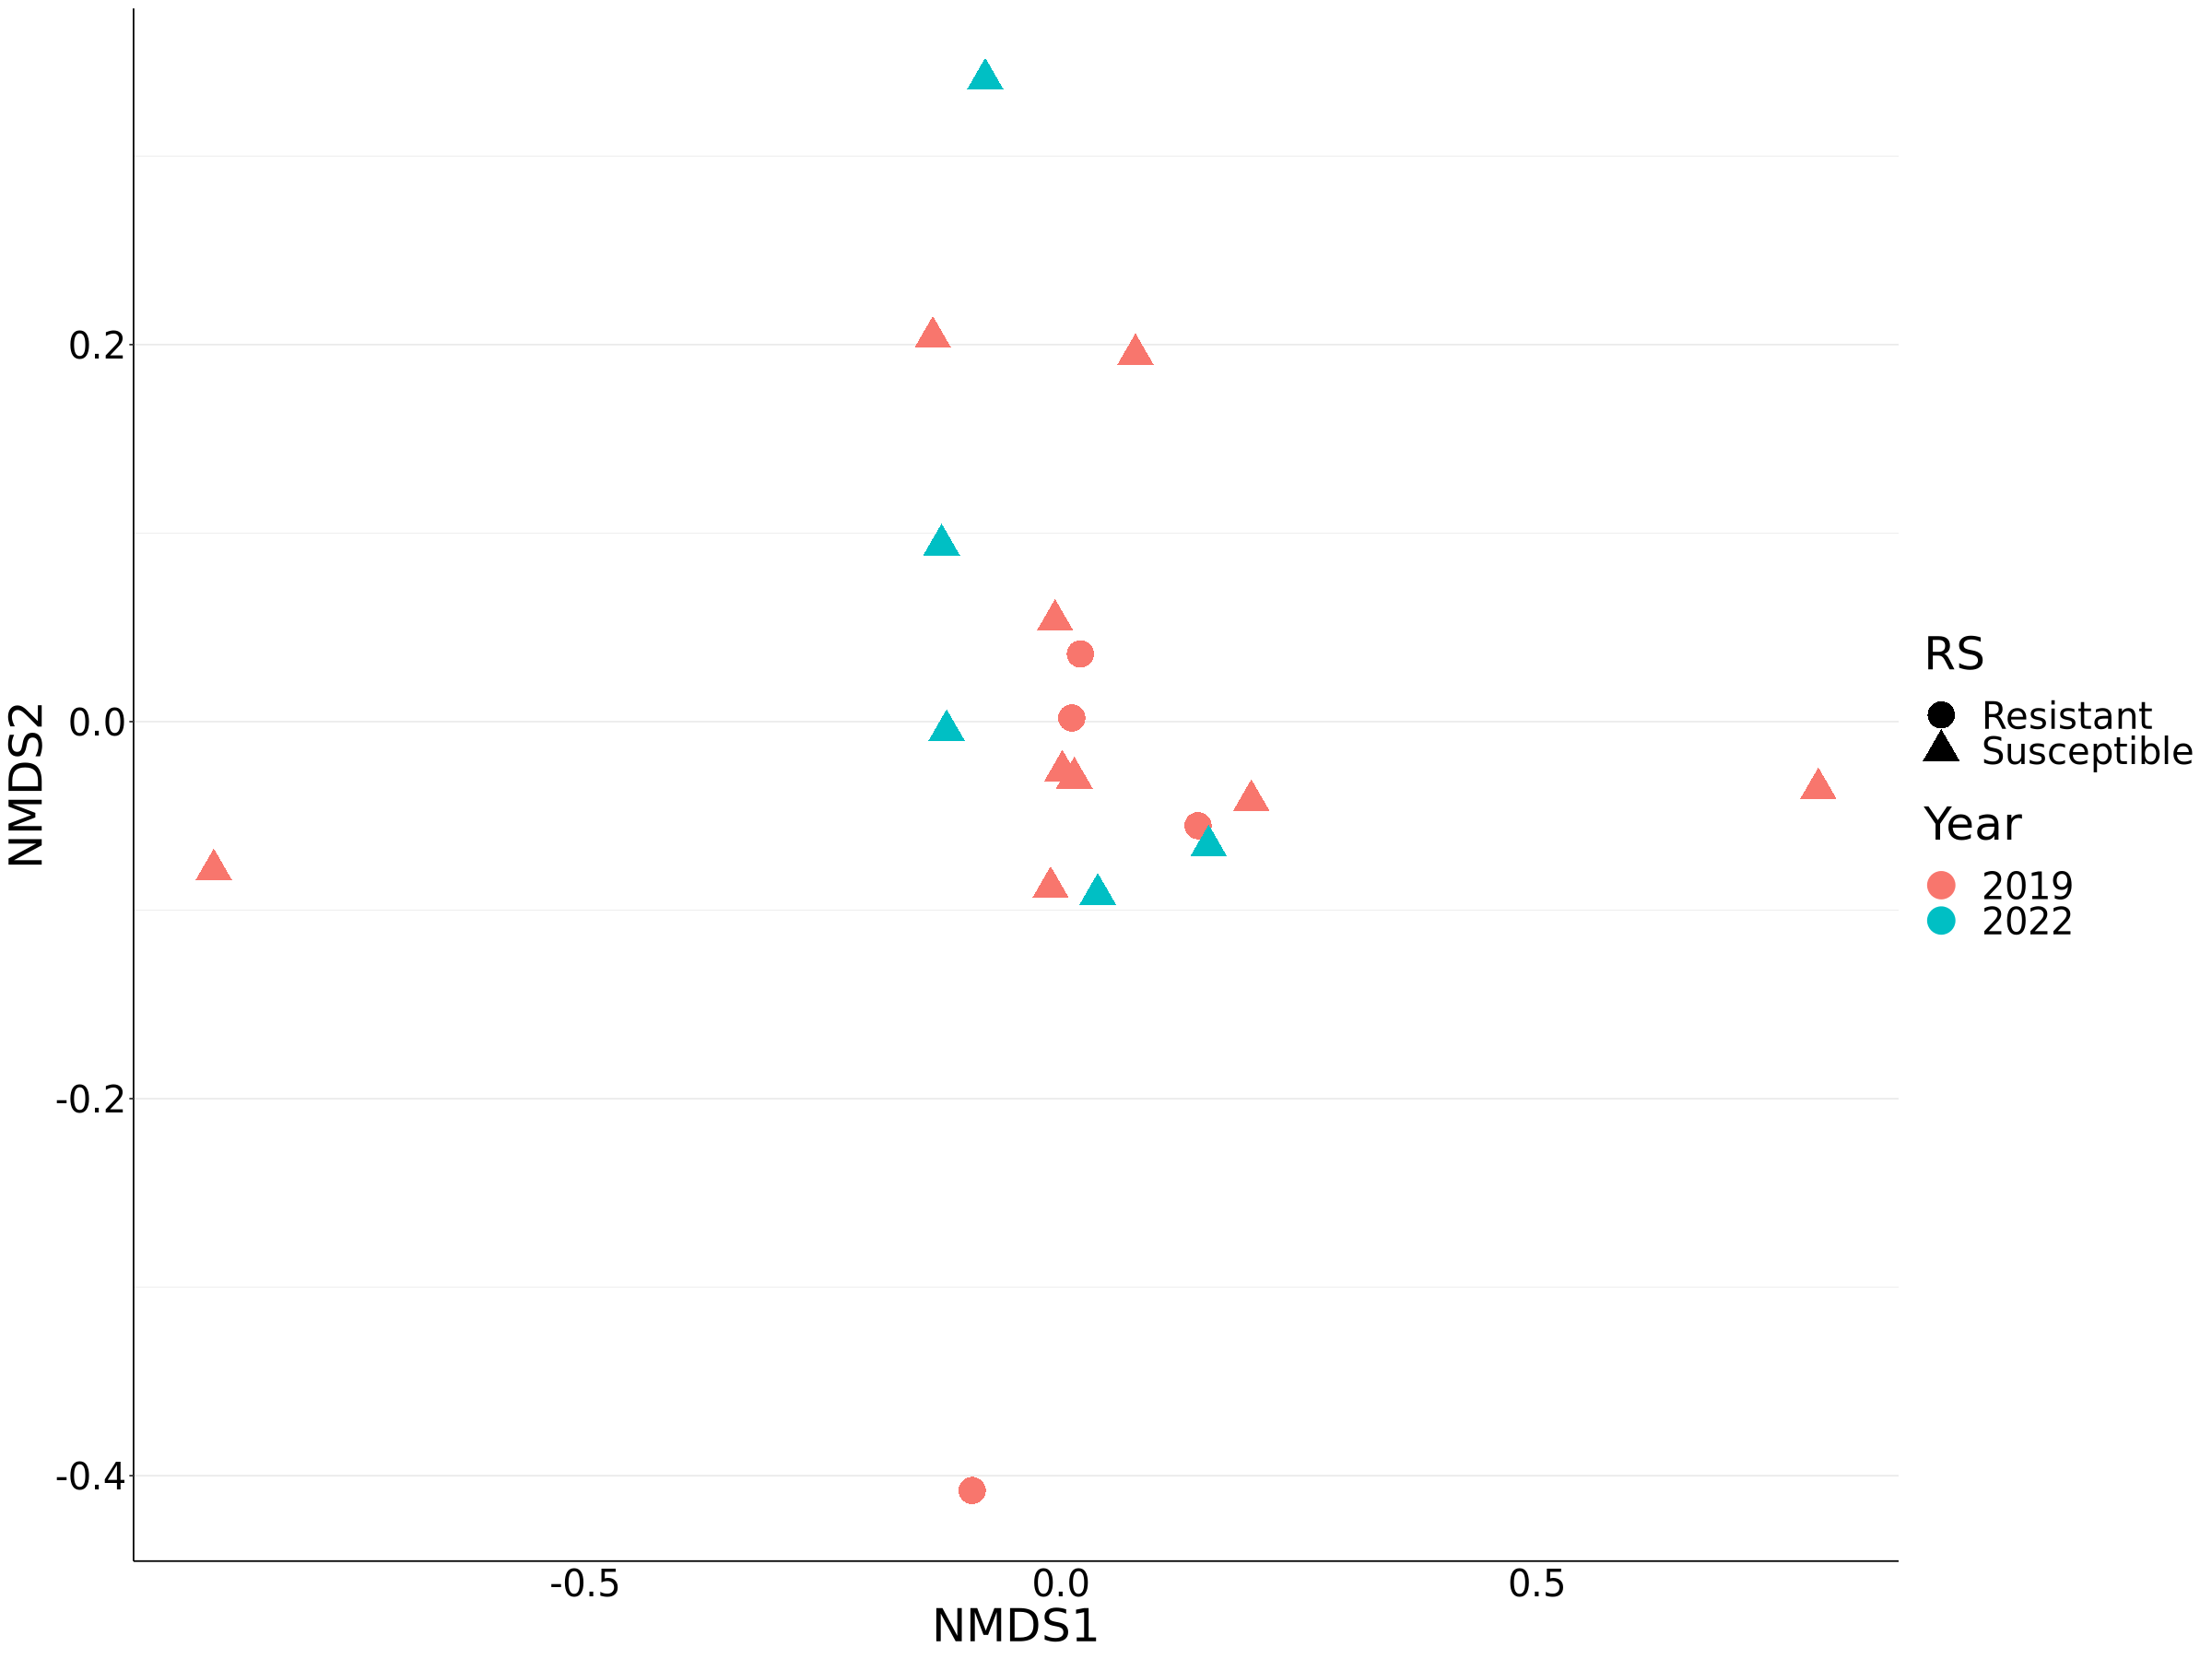

In [238]:
# visualize ordination plot
plot_ordination(Corals, Corals.ord, type="samples", color="Year", shape="RS"
               )+
geom_point(size=8)+
theme_bw()+
 theme(legend.position="right", panel.border = element_blank(),
          panel.grid.major.x = element_blank(),
          panel.grid.minor.x = element_blank(),
          axis.ticks.x=element_blank(), axis.line=element_line(color="black"), axis.text=element_text(color="black"),
          text = element_text(size=30))

In [195]:
# save ordination plot
ordination_plot<- plot_ordination(Corals, Corals.ord, type="samples", color="Year", shape="RS"
               )+
geom_point(size=8)+
theme_bw()+
 theme(legend.position="right", panel.border = element_blank(),
          panel.grid.major.x = element_blank(),
          panel.grid.minor.x = element_blank(),
          axis.ticks.x=element_blank(), axis.line=element_line(color="black"), axis.text=element_text(color="black"),
          text = element_text(size=30))
ggsave(filename = "ordination_plot.pdf", plot = ordination_plot, width = 15, height = 10)

In [183]:
#plot_path<- "/project/pi_sarah_gignouxwolfsohn_uml_edu/brooke/mcav/healthy_2019_mcav/taxonomy/plots"

In [184]:
#file_name <- "RS_nMDS_2019v2022.pdf"

In [185]:
#full_path <- file.path(plot_path, file_name)

In [189]:
#setwd('/project/pi_sarah_gignouxwolfsohn_uml_edu/brooke/mcav/healthy_2019_mcav/taxonomy/plots')

Warning message in plot_ordination(Corals, Corals.ord, type = "samples", color = "Year", :
“Shape variable was not found in the available data you provided.No shape mapped.”


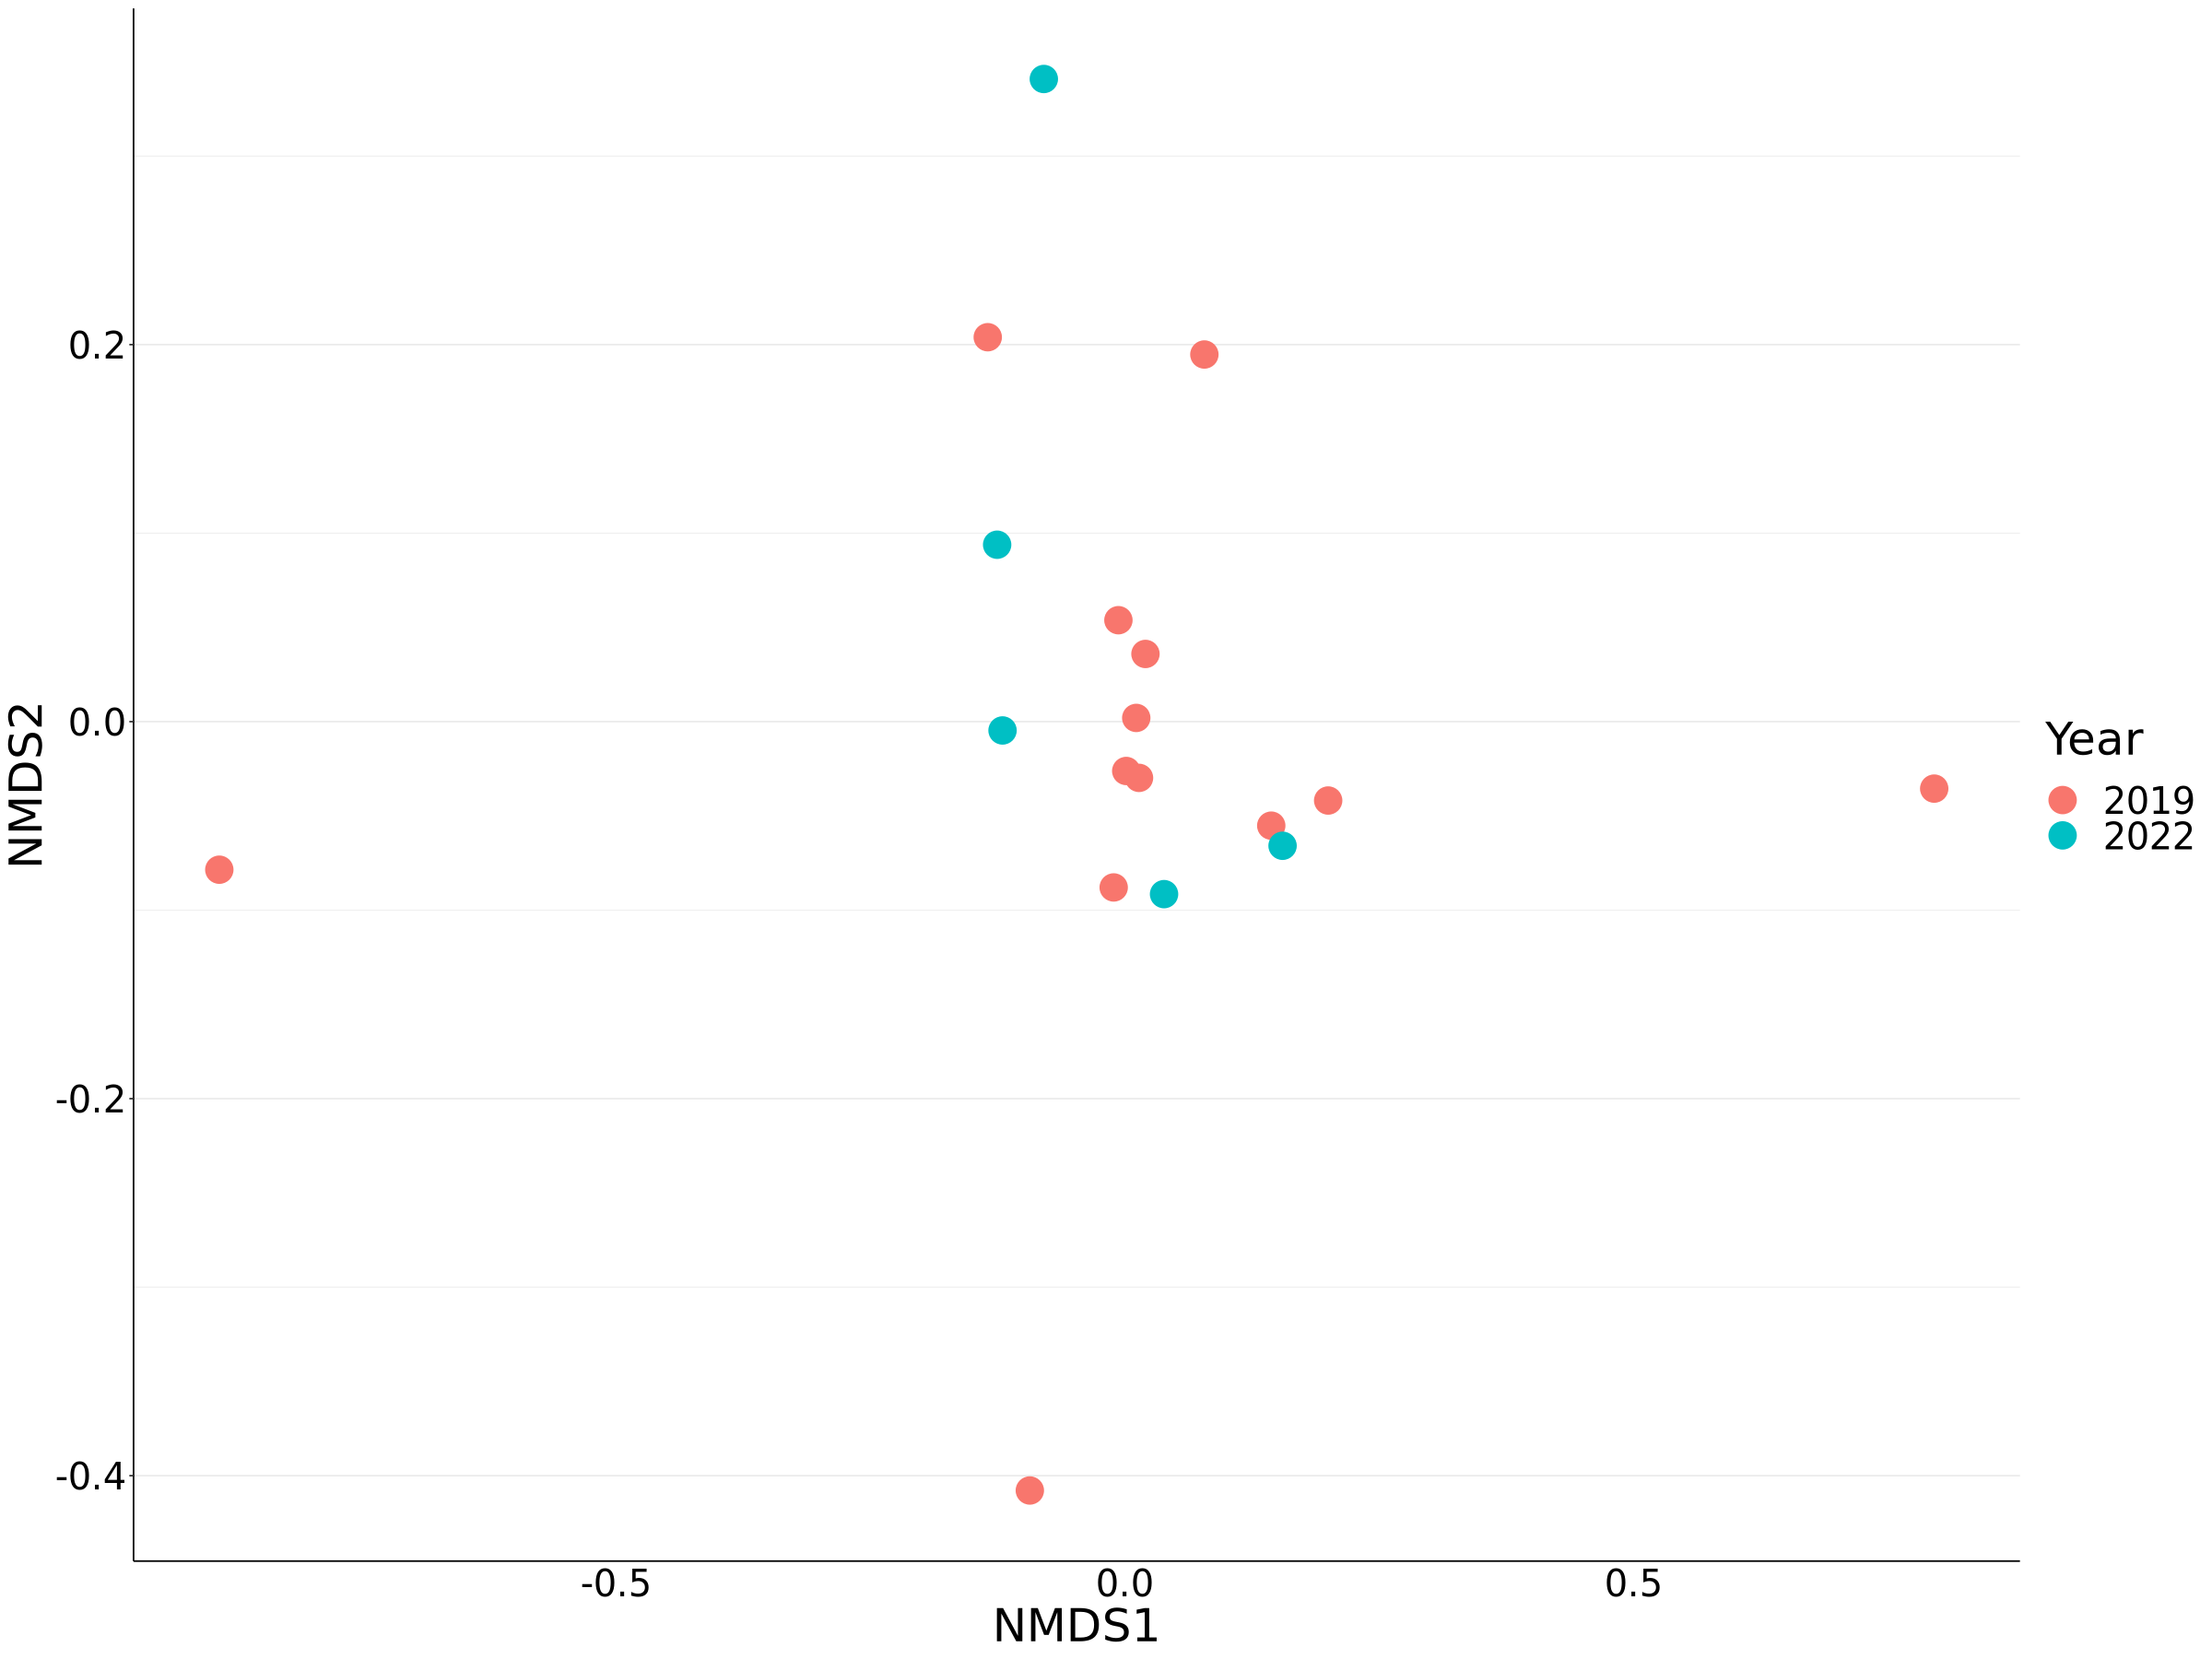

In [239]:
plot_ordination(Corals, Corals.ord, type="samples", color="Year", shape="Health.status")+
geom_point(size=8)+
theme_bw()+
 theme(legend.position="right", panel.border = element_blank(),
          panel.grid.major.x = element_blank(),
          panel.grid.minor.x = element_blank(),
          axis.ticks.x=element_blank(), axis.line=element_line(color="black"), axis.text=element_text(color="black"),
          text = element_text(size=30))

In [ ]:
ggsave(file="/project/pi_sarah_gignouxwolfsohn_uml_edu/brooke/mcav/figures/health_status_nMDS.pdf", width = 15, height=10)


In [123]:
sample_variables(Corals)

[1] "TransectNum"                  "NewTagNum"                   
 [3] "Month_year"                   "Country"                     
 [5] "Location"                     "CollectionDate"              
 [7] "Transect.x"                   "OldTagNum.x"                 
 [9] "Species.x"                    "Time_sampled"                
[11] "Time_processed"               "Sample_type"                 
[13] "SampleNum"                    "Health_status"               
[15] "Sampling_notes"               "Tubelabel_species"           
[17] "Sample_physical_location"     "Extraction_physical_location"
[19] "Date_sequenced"               "Notes"                       
[21] "Year"                         "SeqID"                       
[23] "X"                            "Date_InitialTag"             
[25] "Transect.y"                   "OldTagNum.y"                 
[27] "Species.y"                    "Meter"                       
[29] "Meters_90"                    "Direction"                   
[31] "Size_Class"                   "Notes_June_2019"             
[33] "MaxDiameter"                  "Height"                      
[35] "Date_DocumentedDisease"       "Date_DocumentedMortality"    
[37] "Notes_May2022"                "Sept_2023"                   
[39] "Nov_2023"                     "Dec_2023"                    
[41] "Jan_2024"                     "Feb_2024"                    
[43] "April_2024"                   "X062019_Condition"           
[45] "X062019_Percentage"           "X052022_Condition"           
[47] "X122022_Condition"            "X052023_Condition"           
[49] "X092023_Condition"            "X092023_Percentage"          
[51] "X112023_Condition"            "X112023_Percentage"          
[53] "X122023_Condition"            "X122023_Percentage"          
[55] "X012024_Condition"            "X012024_Percentage"          
[57] "X022024_Condition"            "X022024_Percentage"          
[59] "X042024_Condition"            "X042024_Percentage"          
[61] "COLONIES_TO_LOOK_AT"          "RS"

In [ ]:
#install.packages('ggplot')
#if (!require("BiocManager", quietly = TRUE))
    #install.packages("BiocManager")

#BiocManager::install("ggplot2")

In [ ]:
#install.packages('RColorBrewer')

In [240]:
library(RColorBrewer)
library(ggplot2)

In [273]:
Corals

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 25486 taxa and 18 samples ]
sample_data() Sample Data:       [ 18 samples by 67 sample variables ]

In [274]:
Corals_10 = prune_taxa(names(sort(taxa_sums(Corals),TRUE)[1:10]), Corals)
Corals_10_norm <- transform_sample_counts(Corals_10, function(x) x / sum(x))

In [275]:
Corals_30 = prune_taxa(names(sort(taxa_sums(Corals),TRUE)[1:30]), Corals)
# normalize abundances (out of 100%)
Corals_30_norm <- transform_sample_counts(Corals_30, function(x) x / sum(x))

In [276]:
Corals_100 = prune_taxa(names(sort(taxa_sums(Corals),TRUE)[1:100]), Corals)
Corals_100_norm <- transform_sample_counts(Corals_100, function(x) x / sum(x))

In [277]:
#colnames(TAX)= c("Genus","OTUID")
colnames(TAX)

[1] "otuid"

In [246]:
#custom_colors <- colorRampPalette(brewer.pal(12, "Paired"))(length(unique(Corals_30_norm@tax_table@.Data[, "OTU"])))
# can't get this to work 

In [247]:
colors<-c("#e28d9f",
"#f46089",
"#ee766f",
"#f86339",
"#dd937b",
"#ef7850",
"#ee9962",
"#ea8027",
"#d18440",
"#ecb884",
"#e89112",
"#e8a64a",
"#f0b127",
"#c19748",
"#bd9626",
"#eac252",
"#b19d64",
"#ddbf29",
"#e4cd76",
"#dbd493",
"#dddd25",
"#dedb54",
"#b5b345",
"#9aa149",
"#a7bc2c",
"#8aa11c",
"#bdd083",
"#b8e450",
"#769d31",
"#91b84b",
"#80b924",
"#b9e67e",
"#8cb860",
"#719d47",
"#67a836",
"#8daa75",
"#61b928",
"#8acd62",
"#40bc27",
"#6b9d5a",
"#83ec66",
"#68af53",
"#85b973",
"#3eaa33",
"#b3e2a7",
"#52c54c",
"#66b66c",
"#46ba58",
"#76b27f",
"#52eb7d",
"#72ed93",
"#8ce3a1",
"#3cbf70",
"#54af79",
"#31ba7f",
"#6bb391",
"#53efb6",
"#42bd95",
"#86e6ca",
"#5db3a3",
"#31b7a3",
"#3ceae0",
"#47b4b5",
"#76e0ed",
"#2bbcce",
"#409cb3",
"#409cb3",
"#409cb3",
"#409cb3",
"#409cb3",
"#409cb3",
"#409cb3",
"#409cb3",
"#409cb3",
"#409cb3",
"#409cb3",
"#409cb3",
"#409cb3",
"#409cb3",
"#409cb3",
"#409cb3",
"#5eb7cf",
"#4acaf2",
"#45a5d8",
"#9abcf1",
"#729bde",
"#5d92f5",
"#978ce7",
"#a47ff0",
"#b596de",
"#deb9f3",
"#c471f4",
"#dc95e5",
"#de74e0",
"#cb97c5",
"#f257d4",
"#e77ace",
"#d785b9",
"#f84bb0",
"#ed74a9")

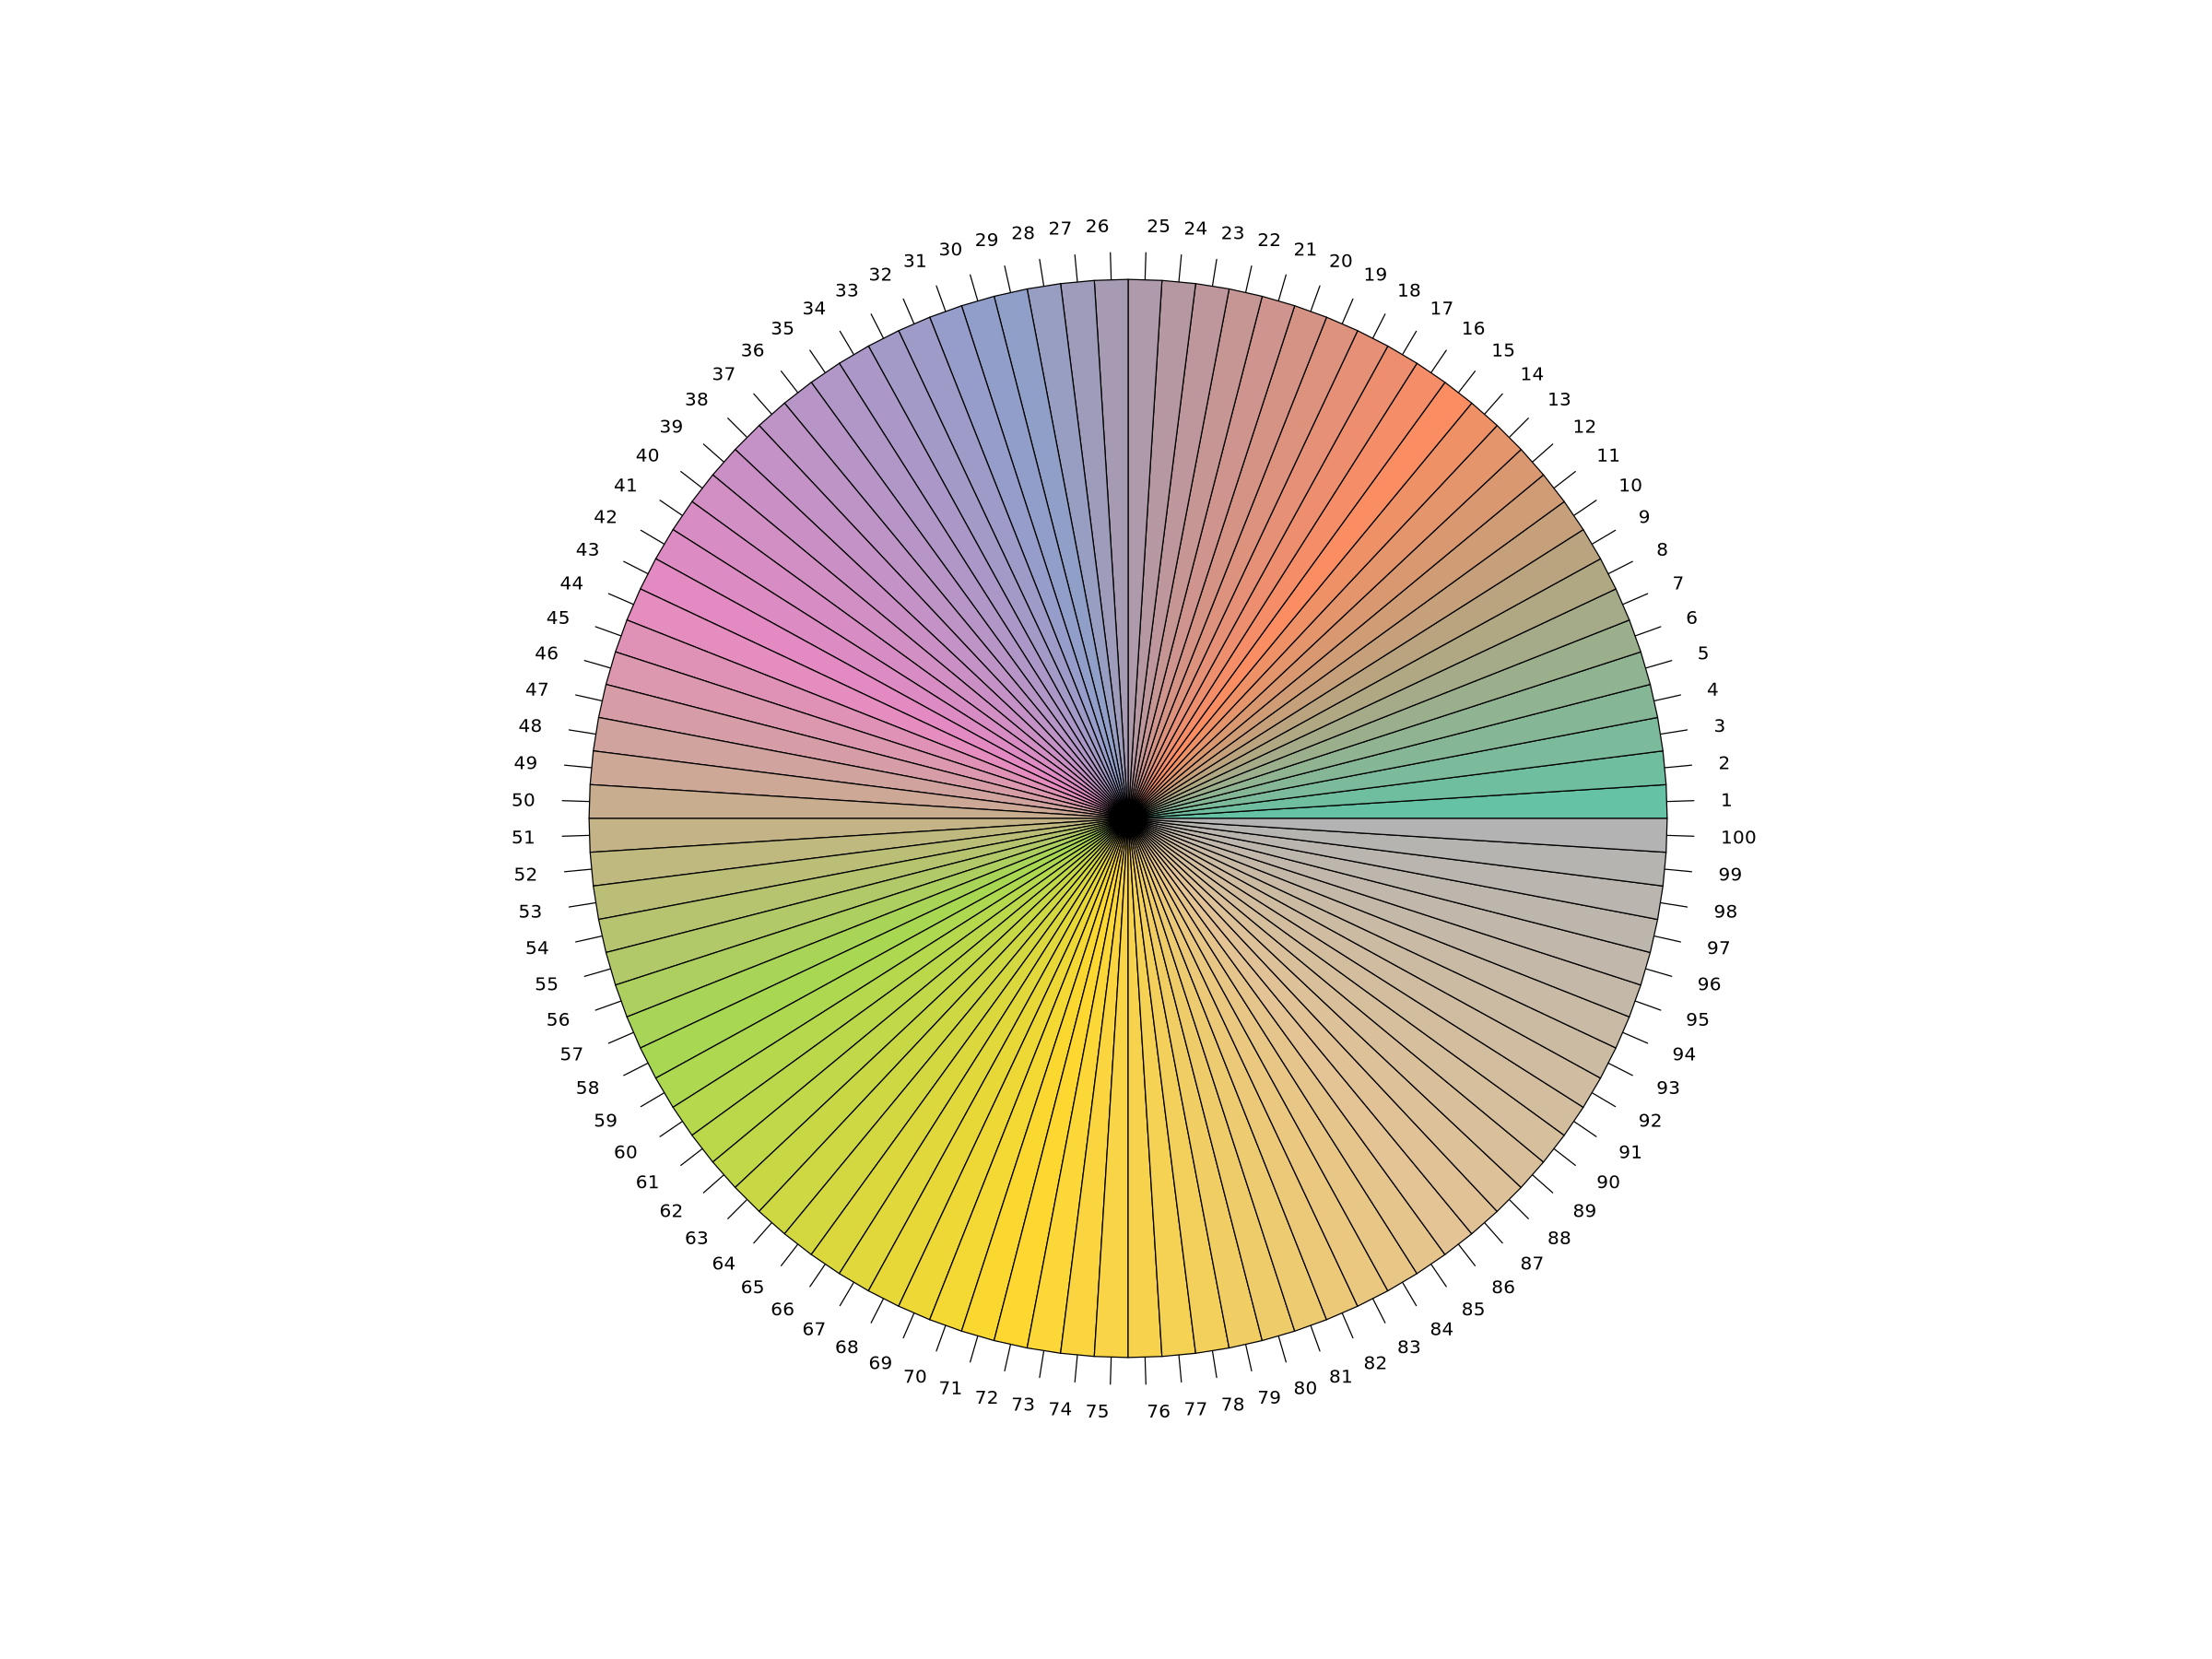

In [248]:
coul <- brewer.pal(8, "Set2") 

# Add more colors to this palette :
coul <- colorRampPalette(coul)(100)

# Plot it
pie(rep(1, length(coul)), col = coul , main="") 

In [249]:
colors_30<- c("#e28d99",
"#ee7473",
"#f2703f",
"#dc966f",
"#de9435",
"#d6b36e",
"#dbbf37",
"#abb160",
"#bdd630",
"#bade6b",
"#7ead3b",
"#bcdc9c",
"#66d34d",
"#65d77c",
"#66af7a",
"#5ae5ac",
"#77e3c6",
"#47b1a5",
"#5ae4e5",
"#41aec3",
"#5eceed",
"#3ba1d2",
"#78b0e7",
"#7796ed",
"#b5a5dd",
"#aa7df5",
"#c891e3",
"#e66dd5",
"#de95c9",
"#f2699f")

In [250]:
colors_10<- c("#e97e92",
"#e48e55",
"#ccbd55",
"#85cf54",
"#79ce93",
"#56d2cb",
"#62b2e1",
"#978ded",
"#cd9dd7",
"#e56dd4")

In [321]:
tagID_colors <- colorRampPalette(brewer.pal(12, "Paired"))(length(unique(Corals_30_norm@sam_data$tagID)))
names(tagID_colors) <- unique(Corals_30_norm@sam_data$tagID)


Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


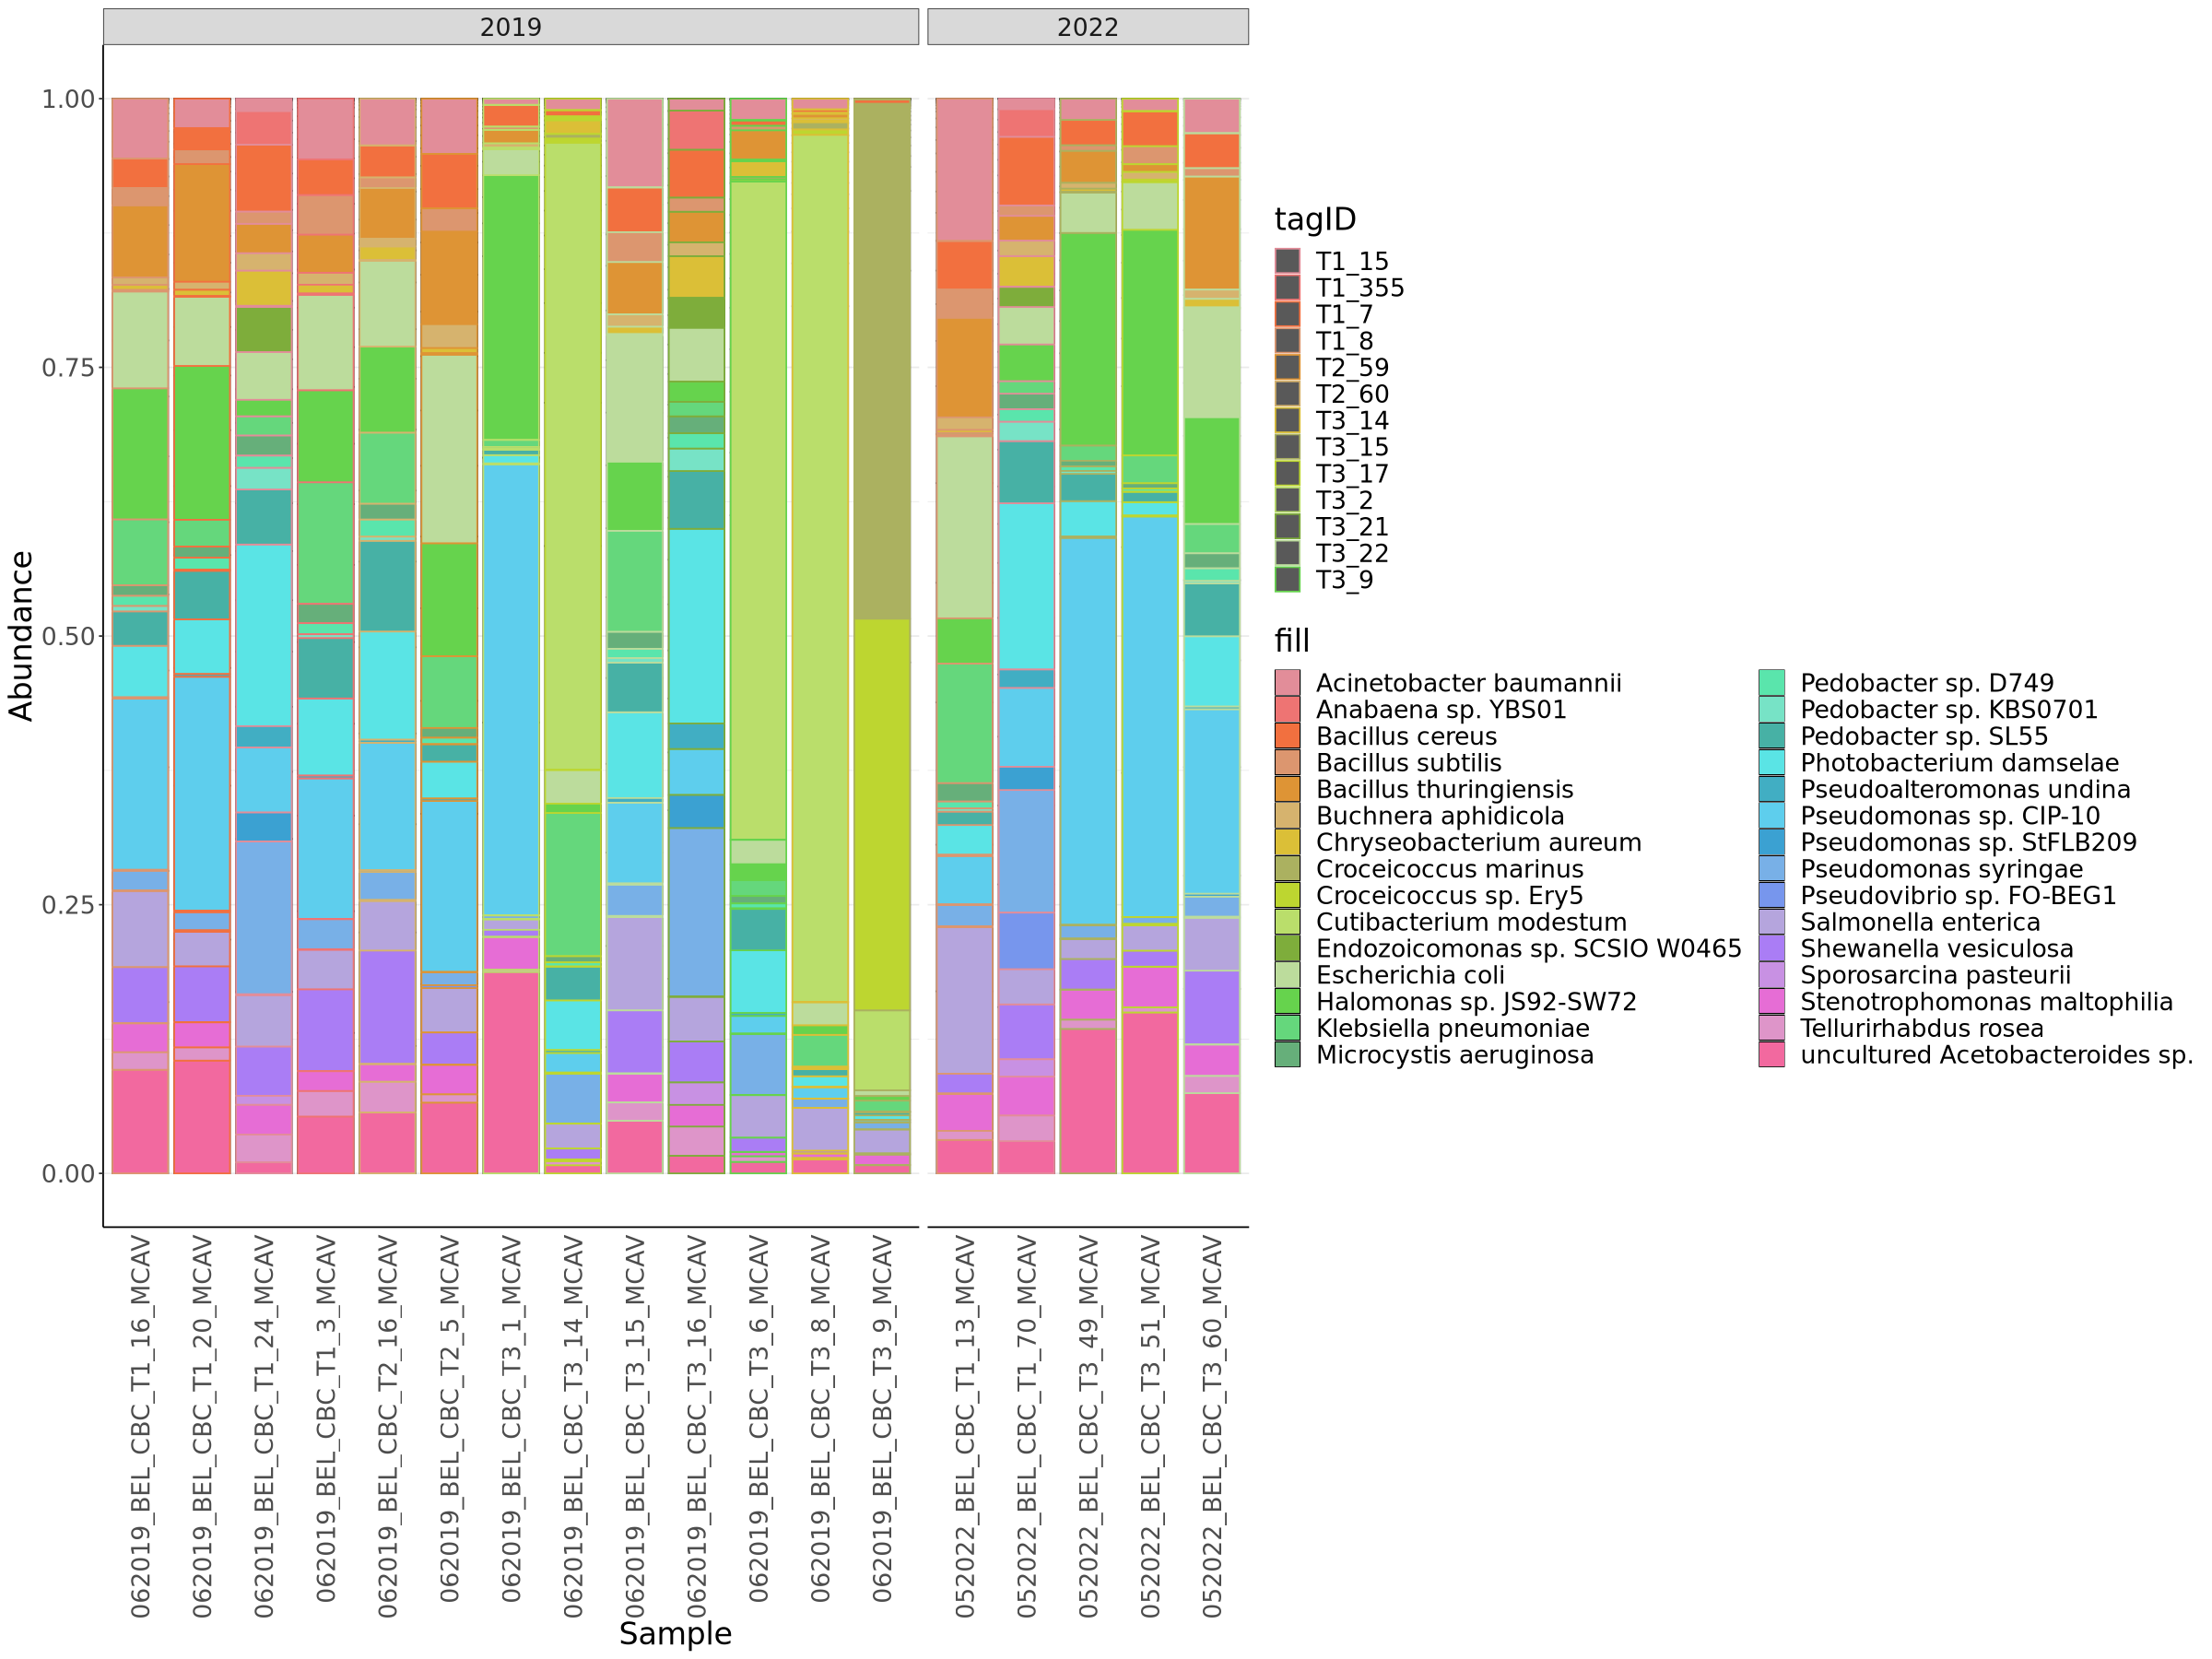

In [322]:
plot_bar(Corals_30_norm) +
  facet_grid(. ~ Year, scales = "free_x", space = "free") +
  geom_bar(aes(fill = OTU, color = tagID), stat = "identity", position = "stack") +
  scale_fill_manual(values = colors_30) +
  scale_color_manual(values = tagID_colors) + 
  theme_bw() +
theme(
    legend.position = "right",
    panel.border = element_blank(),
    panel.grid.major.x = element_blank(),
    panel.grid.minor.x = element_blank(),
    axis.ticks.x = element_blank(),
    axis.line = element_line(color = "black"),
    axis.text.x = element_text(angle = 90, hjust = 1, vjust = 0.5, aes(color = tagID)),  # Color the x-axis text by tagID
    text = element_text(size = 20)
  ) +
  scale_color_manual(values = colors_30) 

In [252]:
# save bar plot - top 30 taxa
mcav_30 <- plot_bar(Corals_30_norm) +
  facet_grid(. ~ Year, scales = "free_x", space = "free") +
  geom_bar(aes(fill = OTU), stat = "identity", position = "stack") +
  scale_fill_manual(values = colors_30) +
  theme_bw() +
  theme(
    legend.position = "right",
    panel.border = element_blank(),
    panel.grid.major.x = element_blank(),
    panel.grid.minor.x = element_blank(),
    axis.ticks.x = element_blank(),
    axis.line = element_line(color = "black"),
    axis.text.x = element_text(angle = 90, hjust = 1, vjust = 0.5),
    text = element_text(size = 20))

ggsave(file="mcav_30.pdf", plot=mcav_30,width = 15, height=10)

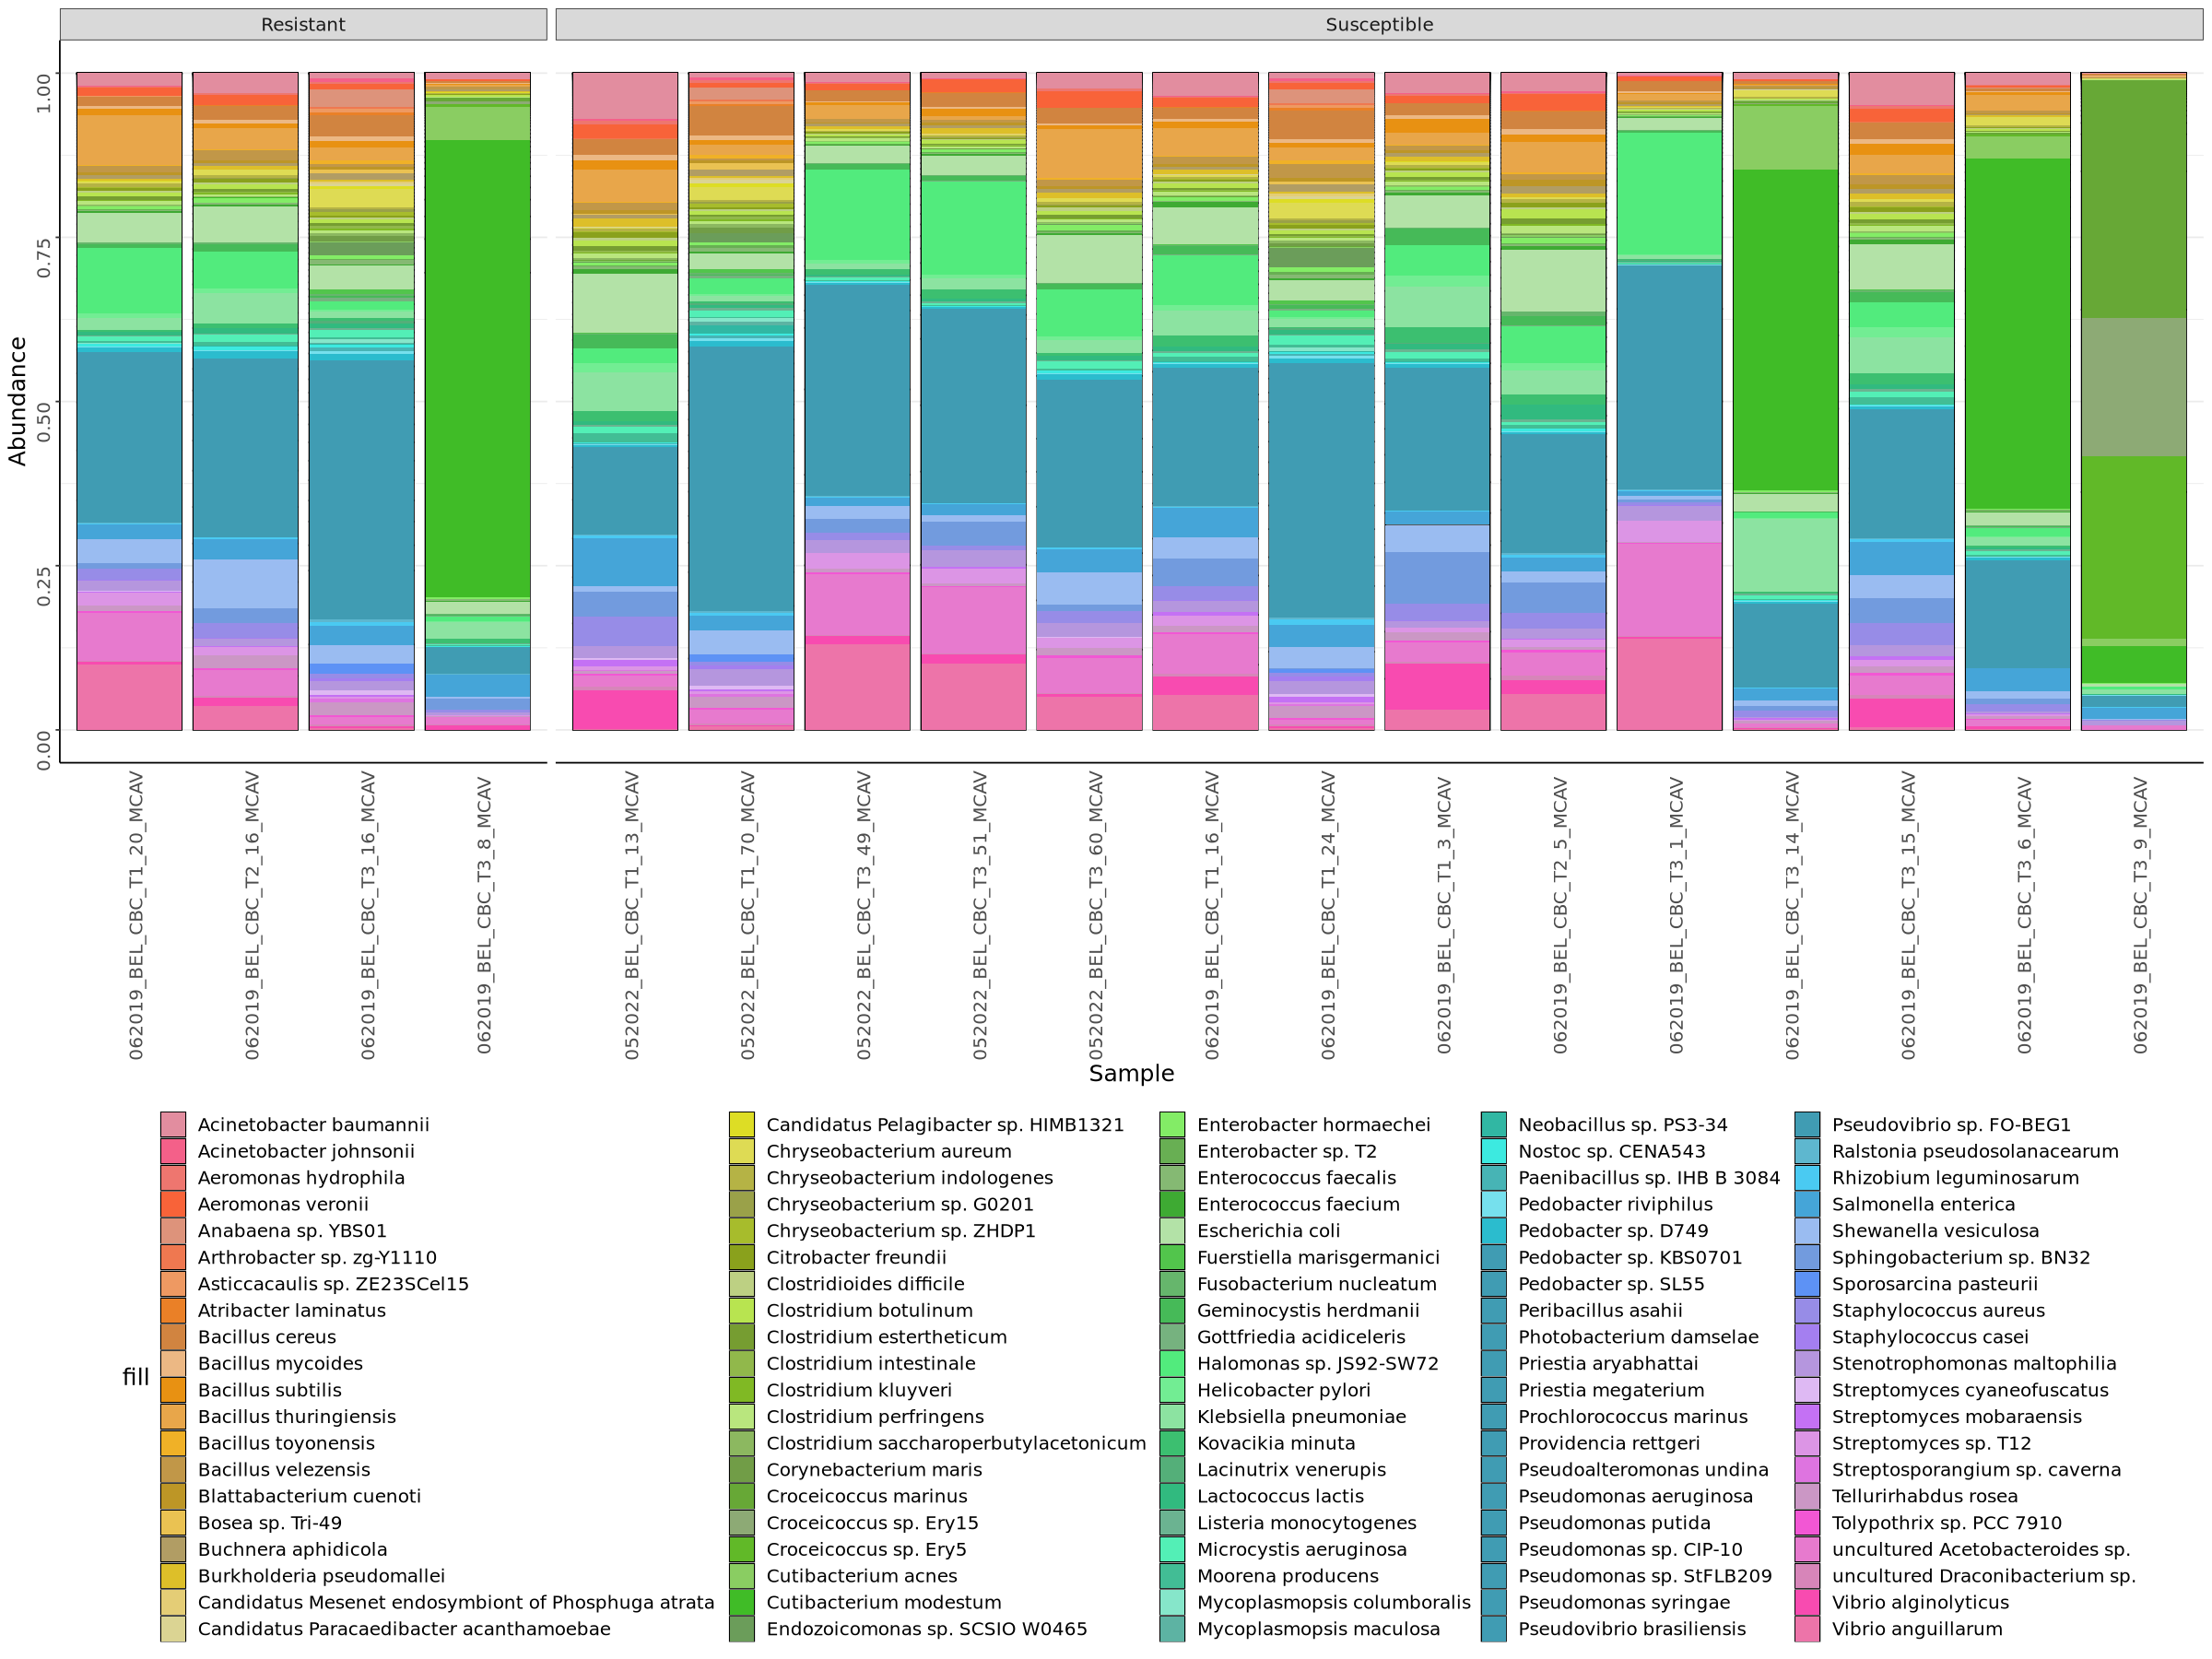

In [291]:
# view bar plot
plot_bar(Corals_100_norm)+
facet_grid(.~RS, scales="free_x", space="free")+
geom_bar(aes(fill=OTU), stat="identity", position="stack")+
scale_fill_manual(values = colors) +
theme_bw()+
theme(legend.position="bottom", panel.border = element_blank(), 
          panel.grid.major.x = element_blank(), 
          panel.grid.minor.x = element_blank(),
          axis.ticks.x=element_blank(), axis.line=element_line(color="black"), axis.text=element_text(angle=90),
          text = element_text(size=15))

In [249]:
# save bar plot
mcav_100_norm<-plot_bar(Corals_100_norm)+
facet_grid(.~RS, scales="free_x", space="free")+
geom_bar(aes(fill=OTU), stat="identity", position="stack")+
scale_fill_manual(values = colors) +
theme_bw()+
theme(legend.position="bottom", panel.border = element_blank(), 
          panel.grid.major.x = element_blank(), 
          panel.grid.minor.x = element_blank(),
          axis.ticks.x=element_blank(), axis.line=element_line(color="black"), axis.text=element_text(angle=90),
          text = element_text(size=15))


In [ ]:
## repeat for mcav - tracking colonies over time 

In [334]:
Corals_match10 = prune_taxa(names(sort(taxa_sums(Corals_match),TRUE)[1:10]), Corals_match)
Corals_match10 <- transform_sample_counts(Corals_match10, function(x) x / sum(x))

In [335]:
Corals_match30 = prune_taxa(names(sort(taxa_sums(Corals_match),TRUE)[1:30]), Corals_match)
# normalize abundances (out of 100%)
Corals_match30 <- transform_sample_counts(Corals_match30, function(x) x / sum(x))

In [336]:
Corals_match100 = prune_taxa(names(sort(taxa_sums(Corals_match),TRUE)[1:100]), Corals_match)
Corals_match100 <- transform_sample_counts(Corals_match100, function(x) x / sum(x))

In [341]:
# order healthy facet to left of diseased 
sample_data <- sample_data(Corals_match100)

# Convert Health_status to factor with specified levels
sample_data$Health_status <- factor(sample_data$Health_status, levels = c("Healthy", "Diseased_Tissue"))

# Update the sample data in the phyloseq object
sample_data(Corals_match100) <- sample_data

In [345]:
setwd('/project/pi_sarah_gignouxwolfsohn_uml_edu/brooke/mcav/healthy_2019_mcav/taxonomy/plots')

In [346]:
# View bar plot with specified facet order
mcav_tracking<-plot_bar(Corals_match100) +
  facet_grid(. ~ Health_status, scales = "free_x", space = "free") +
  geom_bar(aes(fill = OTU), stat = "identity", position = "stack") +
  scale_fill_manual(values = colors) +
  theme_bw() +
  theme(
    legend.position = "bottom",
    panel.border = element_blank(),
    panel.grid.major.x = element_blank(),
    panel.grid.minor.x = element_blank(),
    axis.ticks.x = element_blank(),
    axis.line = element_line(color = "black"),
    axis.text.x = element_text(angle = 90),
    text = element_text(size = 15))
ggsave(file="mcav_tracking.pdf", plot = mcav_tracking,width = 20, height = 20)

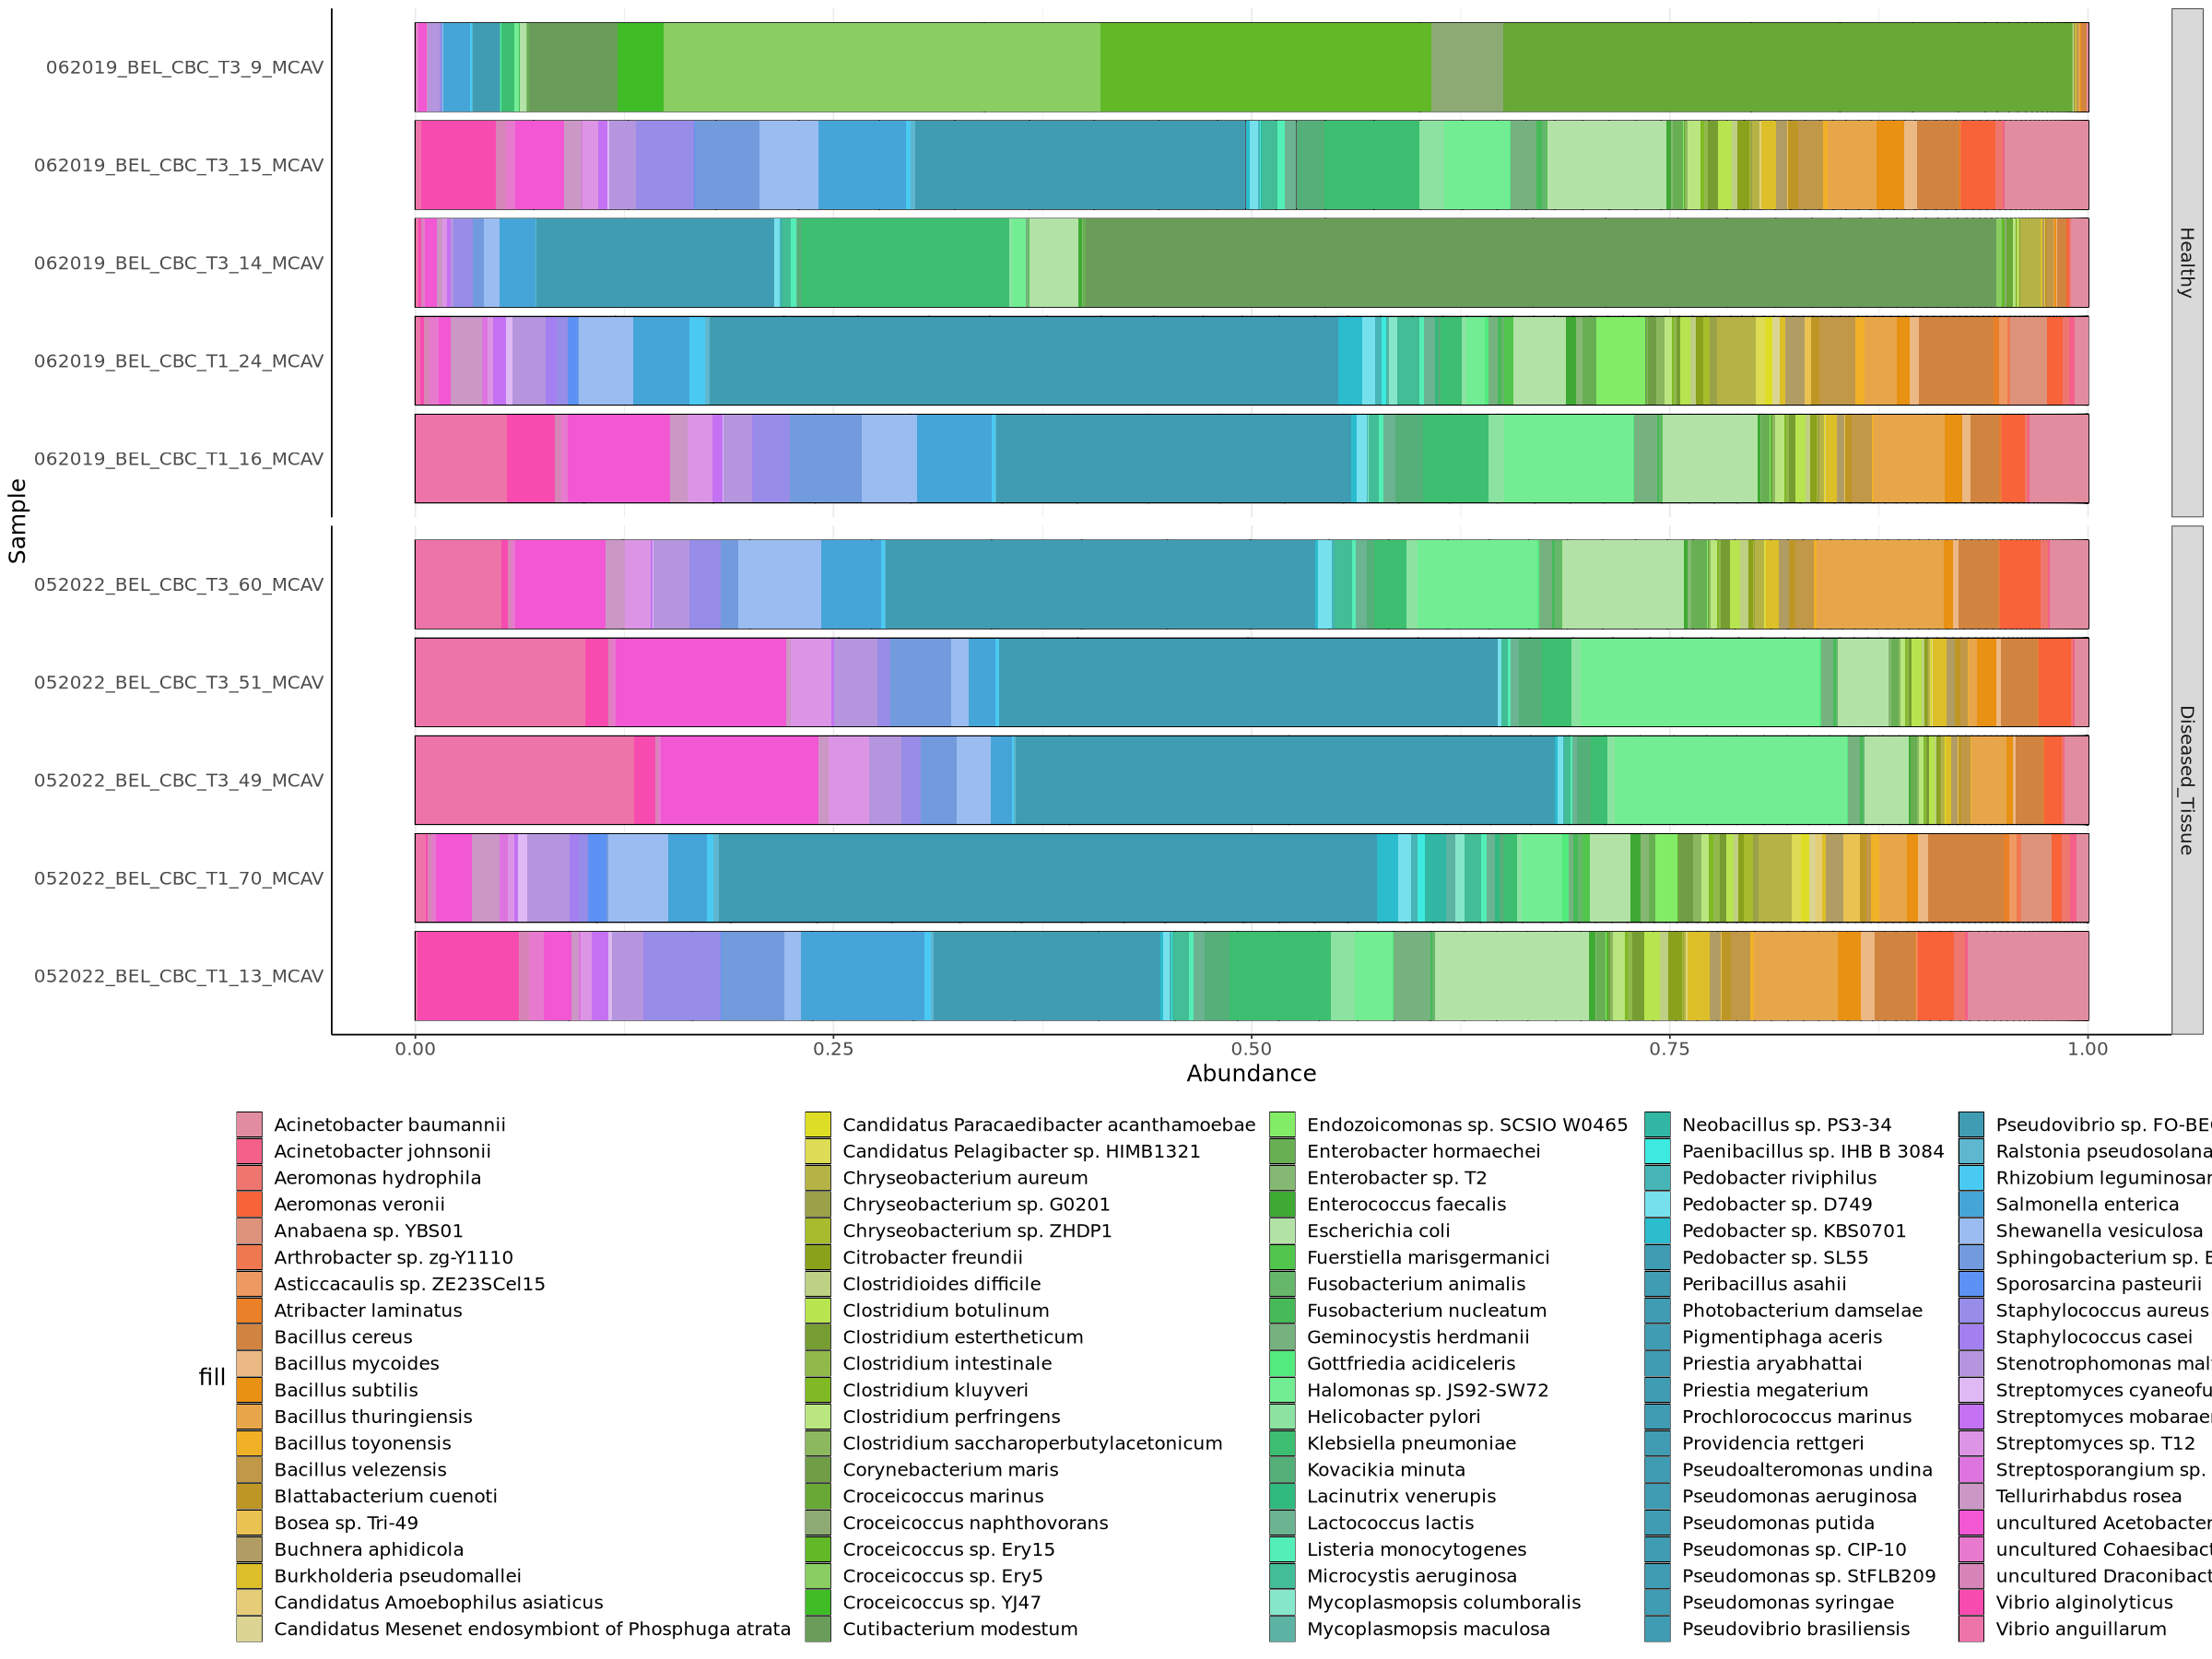

In [347]:
plot_bar(Corals_match100) +
  facet_grid(Health_status ~ ., scales = "free_y", space = "free") +  # Facet on y-axis
  geom_bar(aes(fill = OTU), stat = "identity", position = "stack") +
  scale_fill_manual(values = colors) +
  theme_bw() +
  theme(
    legend.position = "bottom",
    panel.border = element_blank(),
    panel.grid.major.y = element_blank(),  # Removed y-axis grid lines
    panel.grid.minor.y = element_blank(),  # Removed y-axis grid lines
    axis.ticks.y = element_blank(),        # Removed y-axis ticks
    axis.line = element_line(color = "black"),
    axis.text.y = element_text(angle = 0), # Rotate y-axis labels to be horizontal
    text = element_text(size = 15)) +
  coord_flip() 

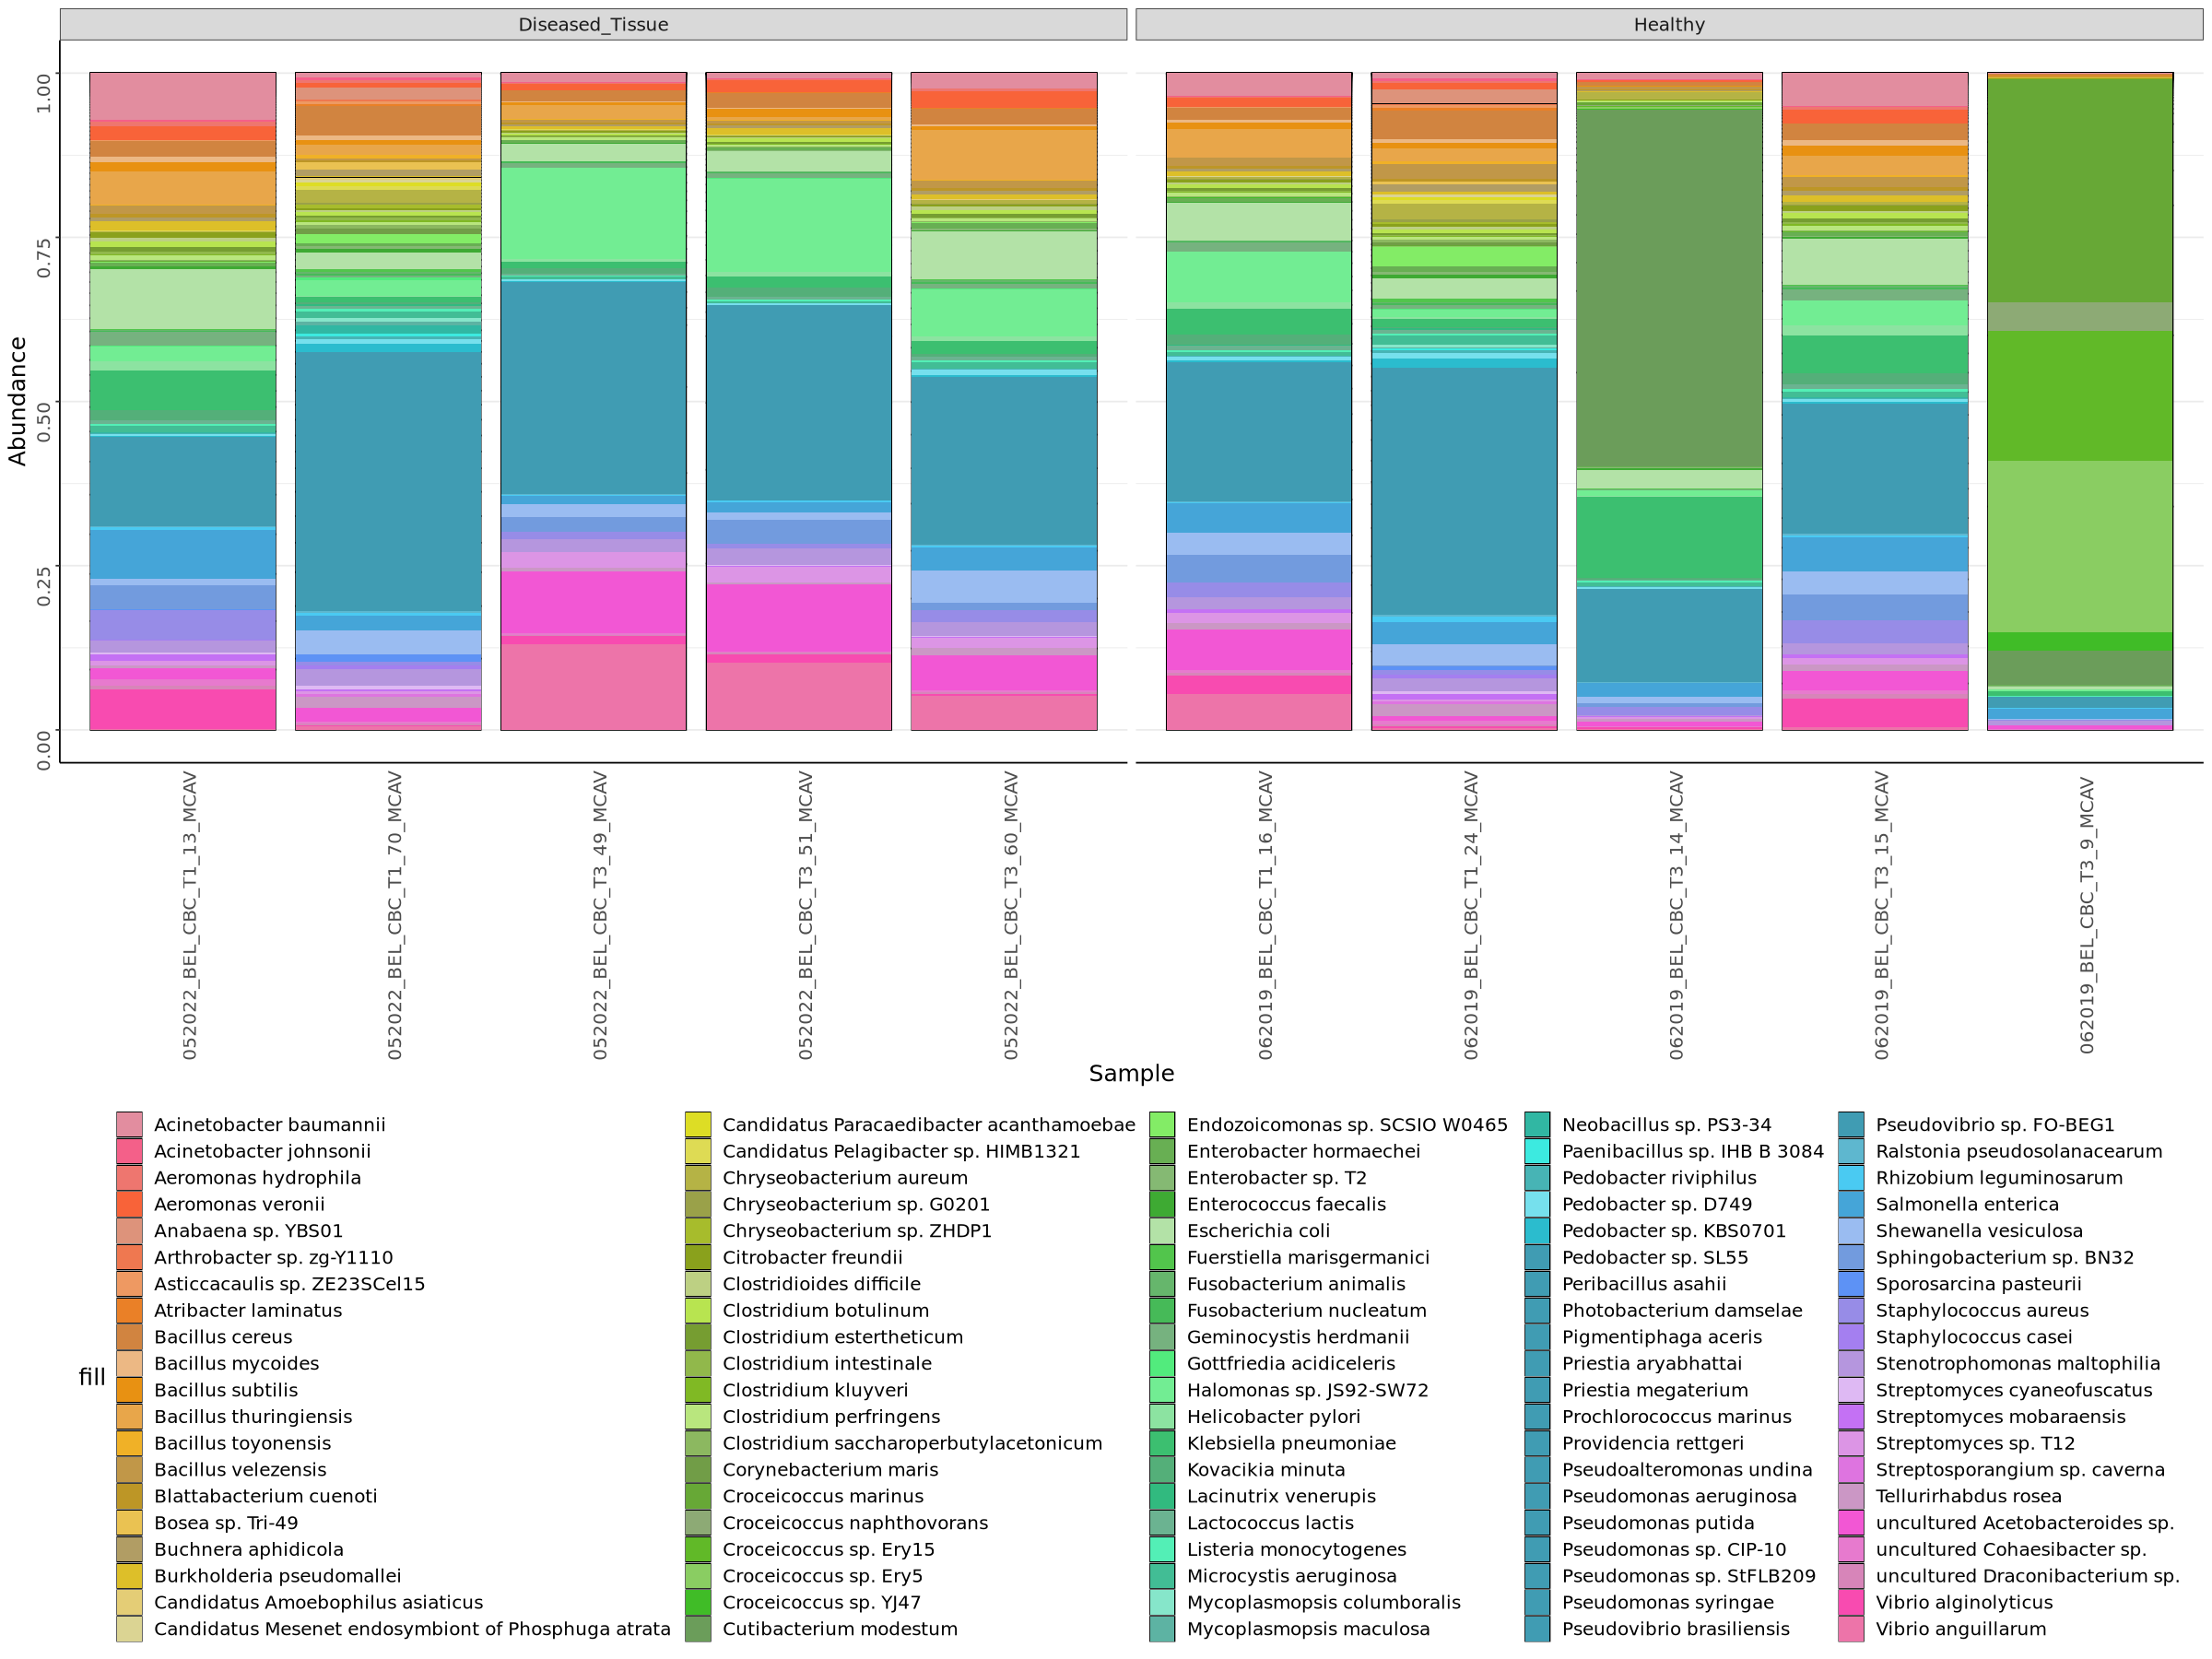

In [337]:
# view bar plot - mcav colonies top 100
plot_bar(Corals_match100)+
facet_grid(.~Health_status, scales="free_x", space="free")+
geom_bar(aes(fill=OTU), stat="identity", position="stack")+
scale_fill_manual(values = colors) +
theme_bw()+
theme(legend.position="bottom", panel.border = element_blank(), 
          panel.grid.major.x = element_blank(), 
          panel.grid.minor.x = element_blank(),
          axis.ticks.x=element_blank(), axis.line=element_line(color="black"), axis.text=element_text(angle=90),
          text = element_text(size=15))

In [250]:
ggsave(file="mcav_100_norm", plot = mcav_100_norm,width = 20, height = 20,device=png)

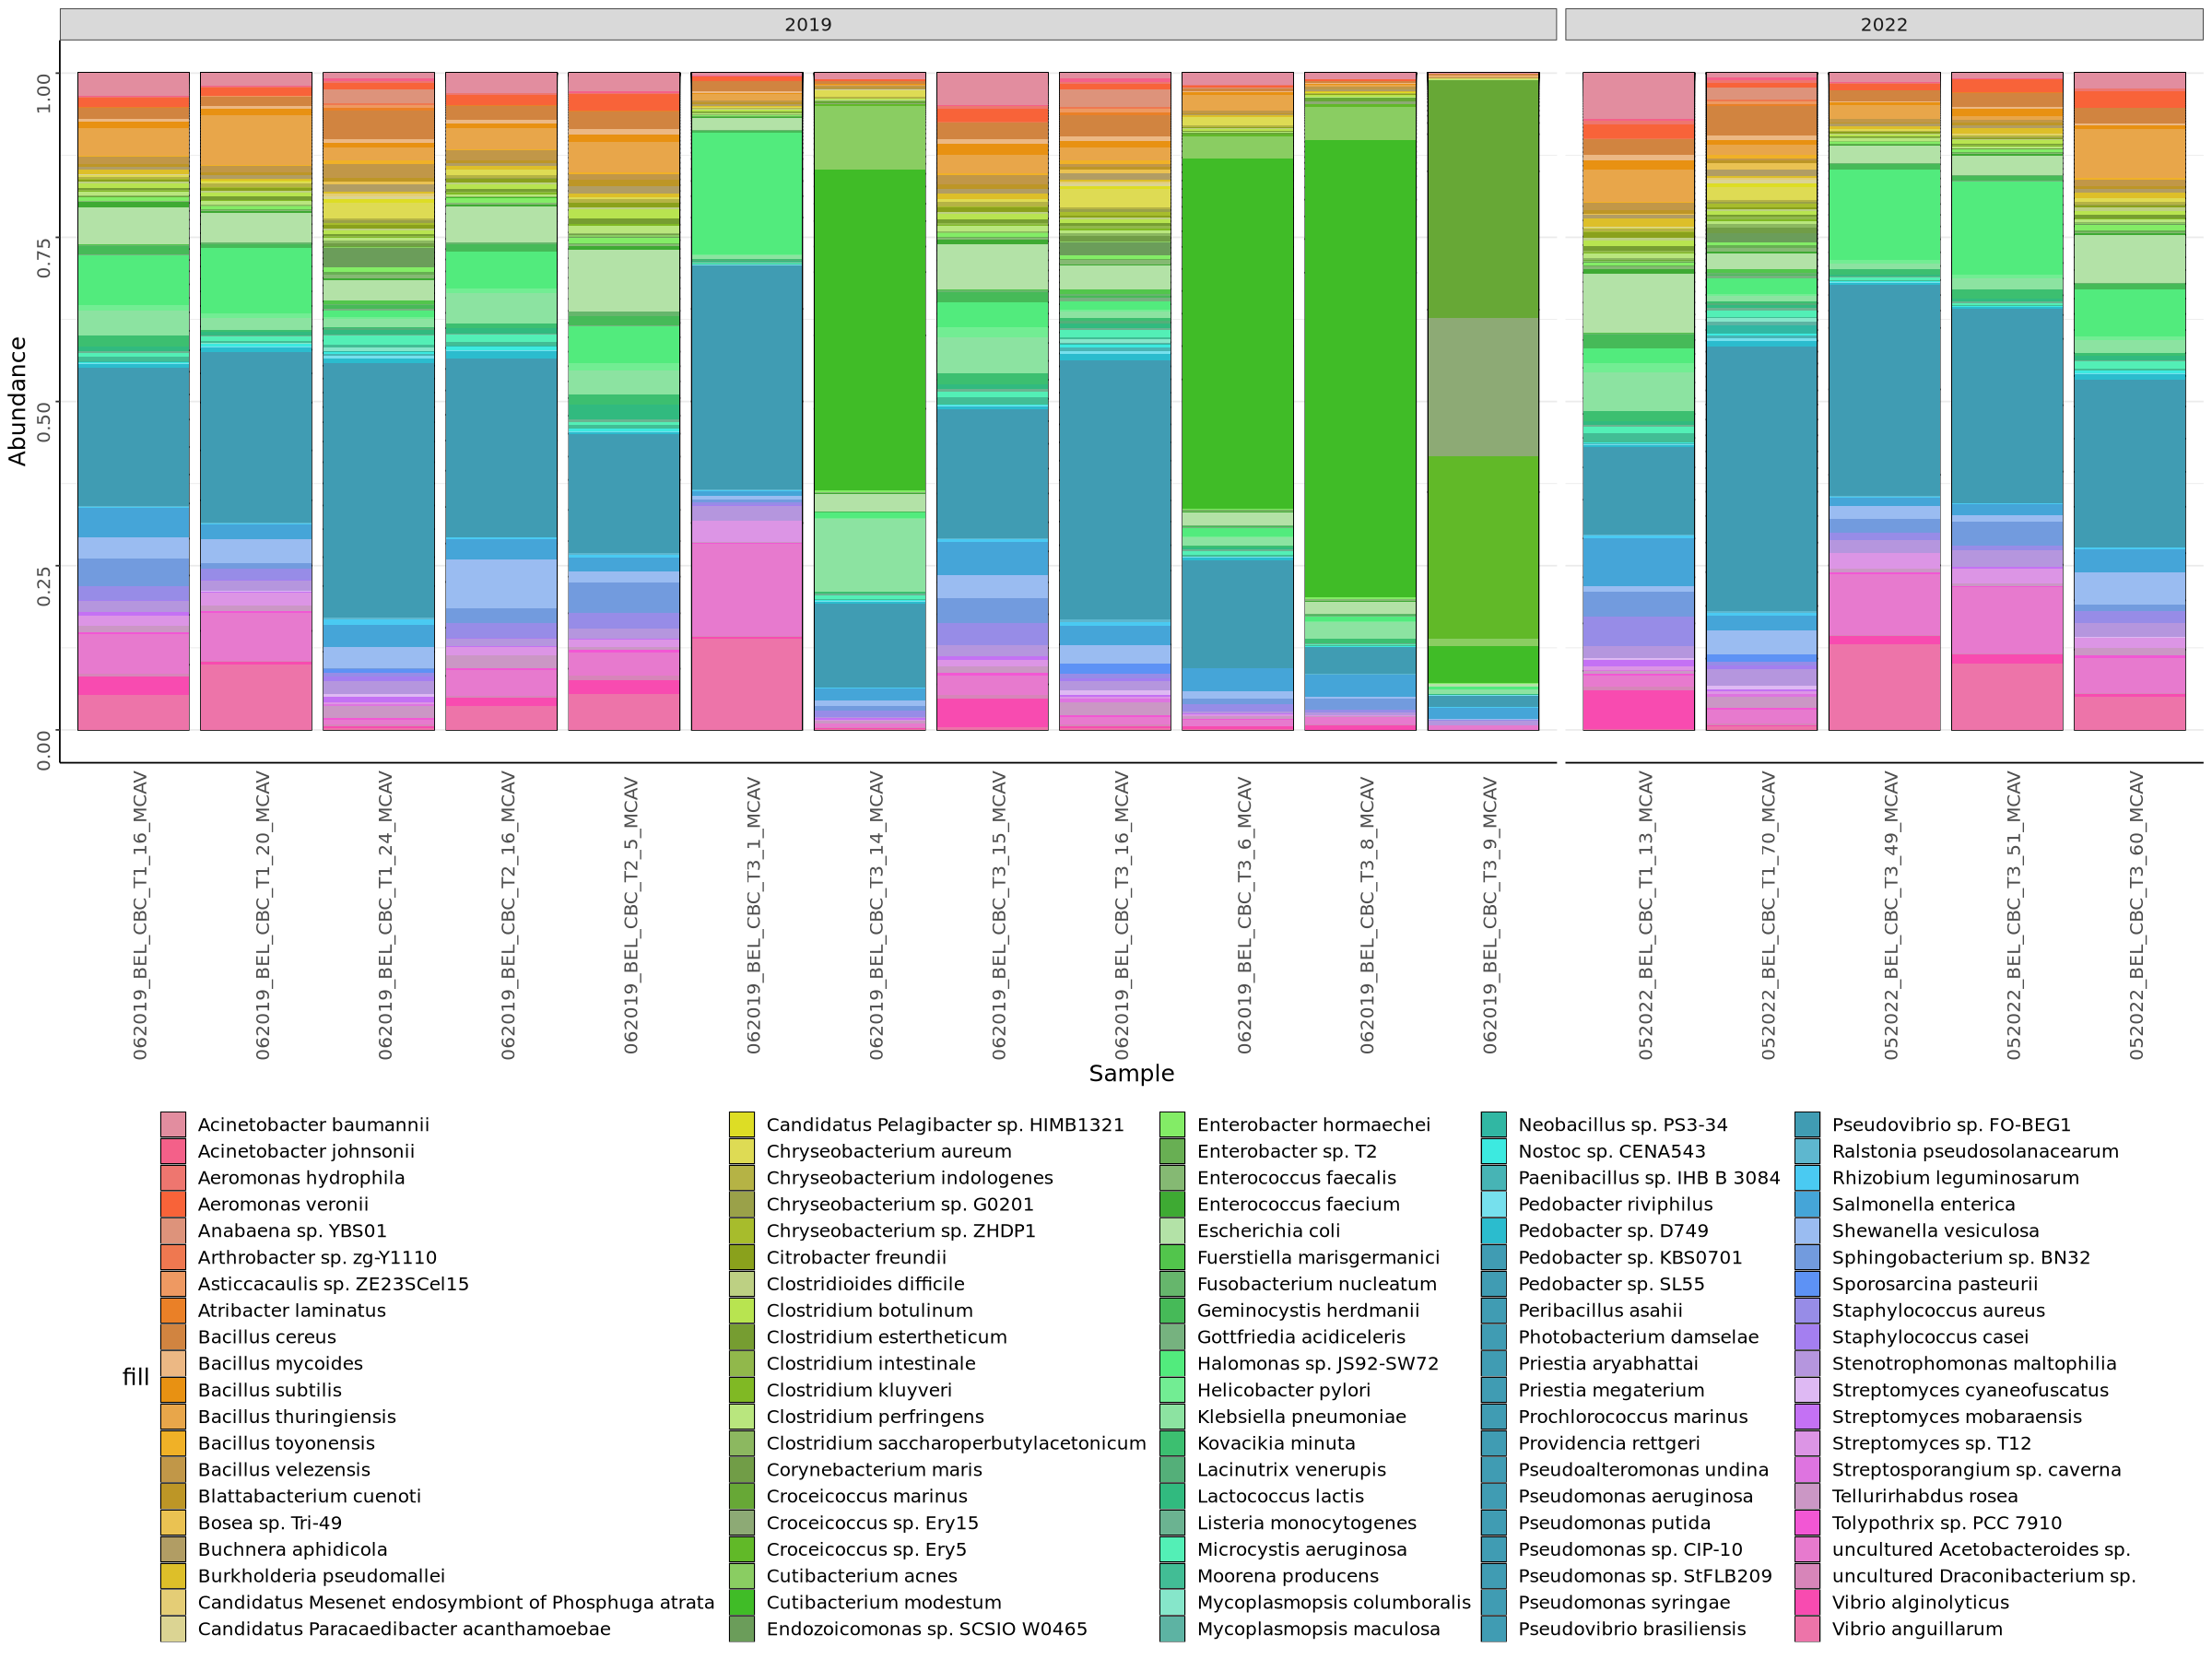

In [267]:
# view bar plot - plot by year 
plot_bar(Corals_100_norm)+
facet_grid(.~Year, scales="free_x", space="free")+
geom_bar(aes(fill=OTU), stat="identity", position="stack")+
scale_fill_manual(values = colors) +
theme_bw()+
theme(legend.position="bottom", panel.border = element_blank(), 
          panel.grid.major.x = element_blank(), 
          panel.grid.minor.x = element_blank(),
          axis.ticks.x=element_blank(), axis.line=element_line(color="black"), axis.text=element_text(angle=90),
          text = element_text(size=15))

In [265]:
# save bar plot
mcav_100_norm_year<-plot_bar(Corals_100_norm)+
facet_grid(.~Year, scales="free_x", space="free")+
geom_bar(aes(fill=OTU), stat="identity", position="stack")+
scale_fill_manual(values = colors) +
theme_bw()+
theme(legend.position="bottom", panel.border = element_blank(), 
          panel.grid.major.x = element_blank(), 
          panel.grid.minor.x = element_blank(),
          axis.ticks.x=element_blank(), axis.line=element_line(color="black"), axis.text=element_text(angle=90),
          text = element_text(size=15))
ggsave(file="mcav_100_year.pdf", plot = mcav_100_norm_year,width = 20, height = 20)

In [137]:
rich=estimate_richness(Corals)
rich

Warning message in estimate_richness(Corals):
“The data you have provided does not have
any singletons. This is highly suspicious. Results of richness
estimates (for example) are probably unreliable, or wrong, if you have already
trimmed low-abundance taxa from the data.

We recommended that you find the un-trimmed data and retry.”


ERROR: Error in h(simpleError(msg, call)): error in evaluating the argument 'x' in selecting a method for function 't': function accepts only integers (counts)


Warning message in estimate_richness(physeq, split = TRUE, measures = measures):
“The data you have provided does not have
any singletons. This is highly suspicious. Results of richness
estimates (for example) are probably unreliable, or wrong, if you have already
trimmed low-abundance taxa from the data.

We recommended that you find the un-trimmed data and retry.”


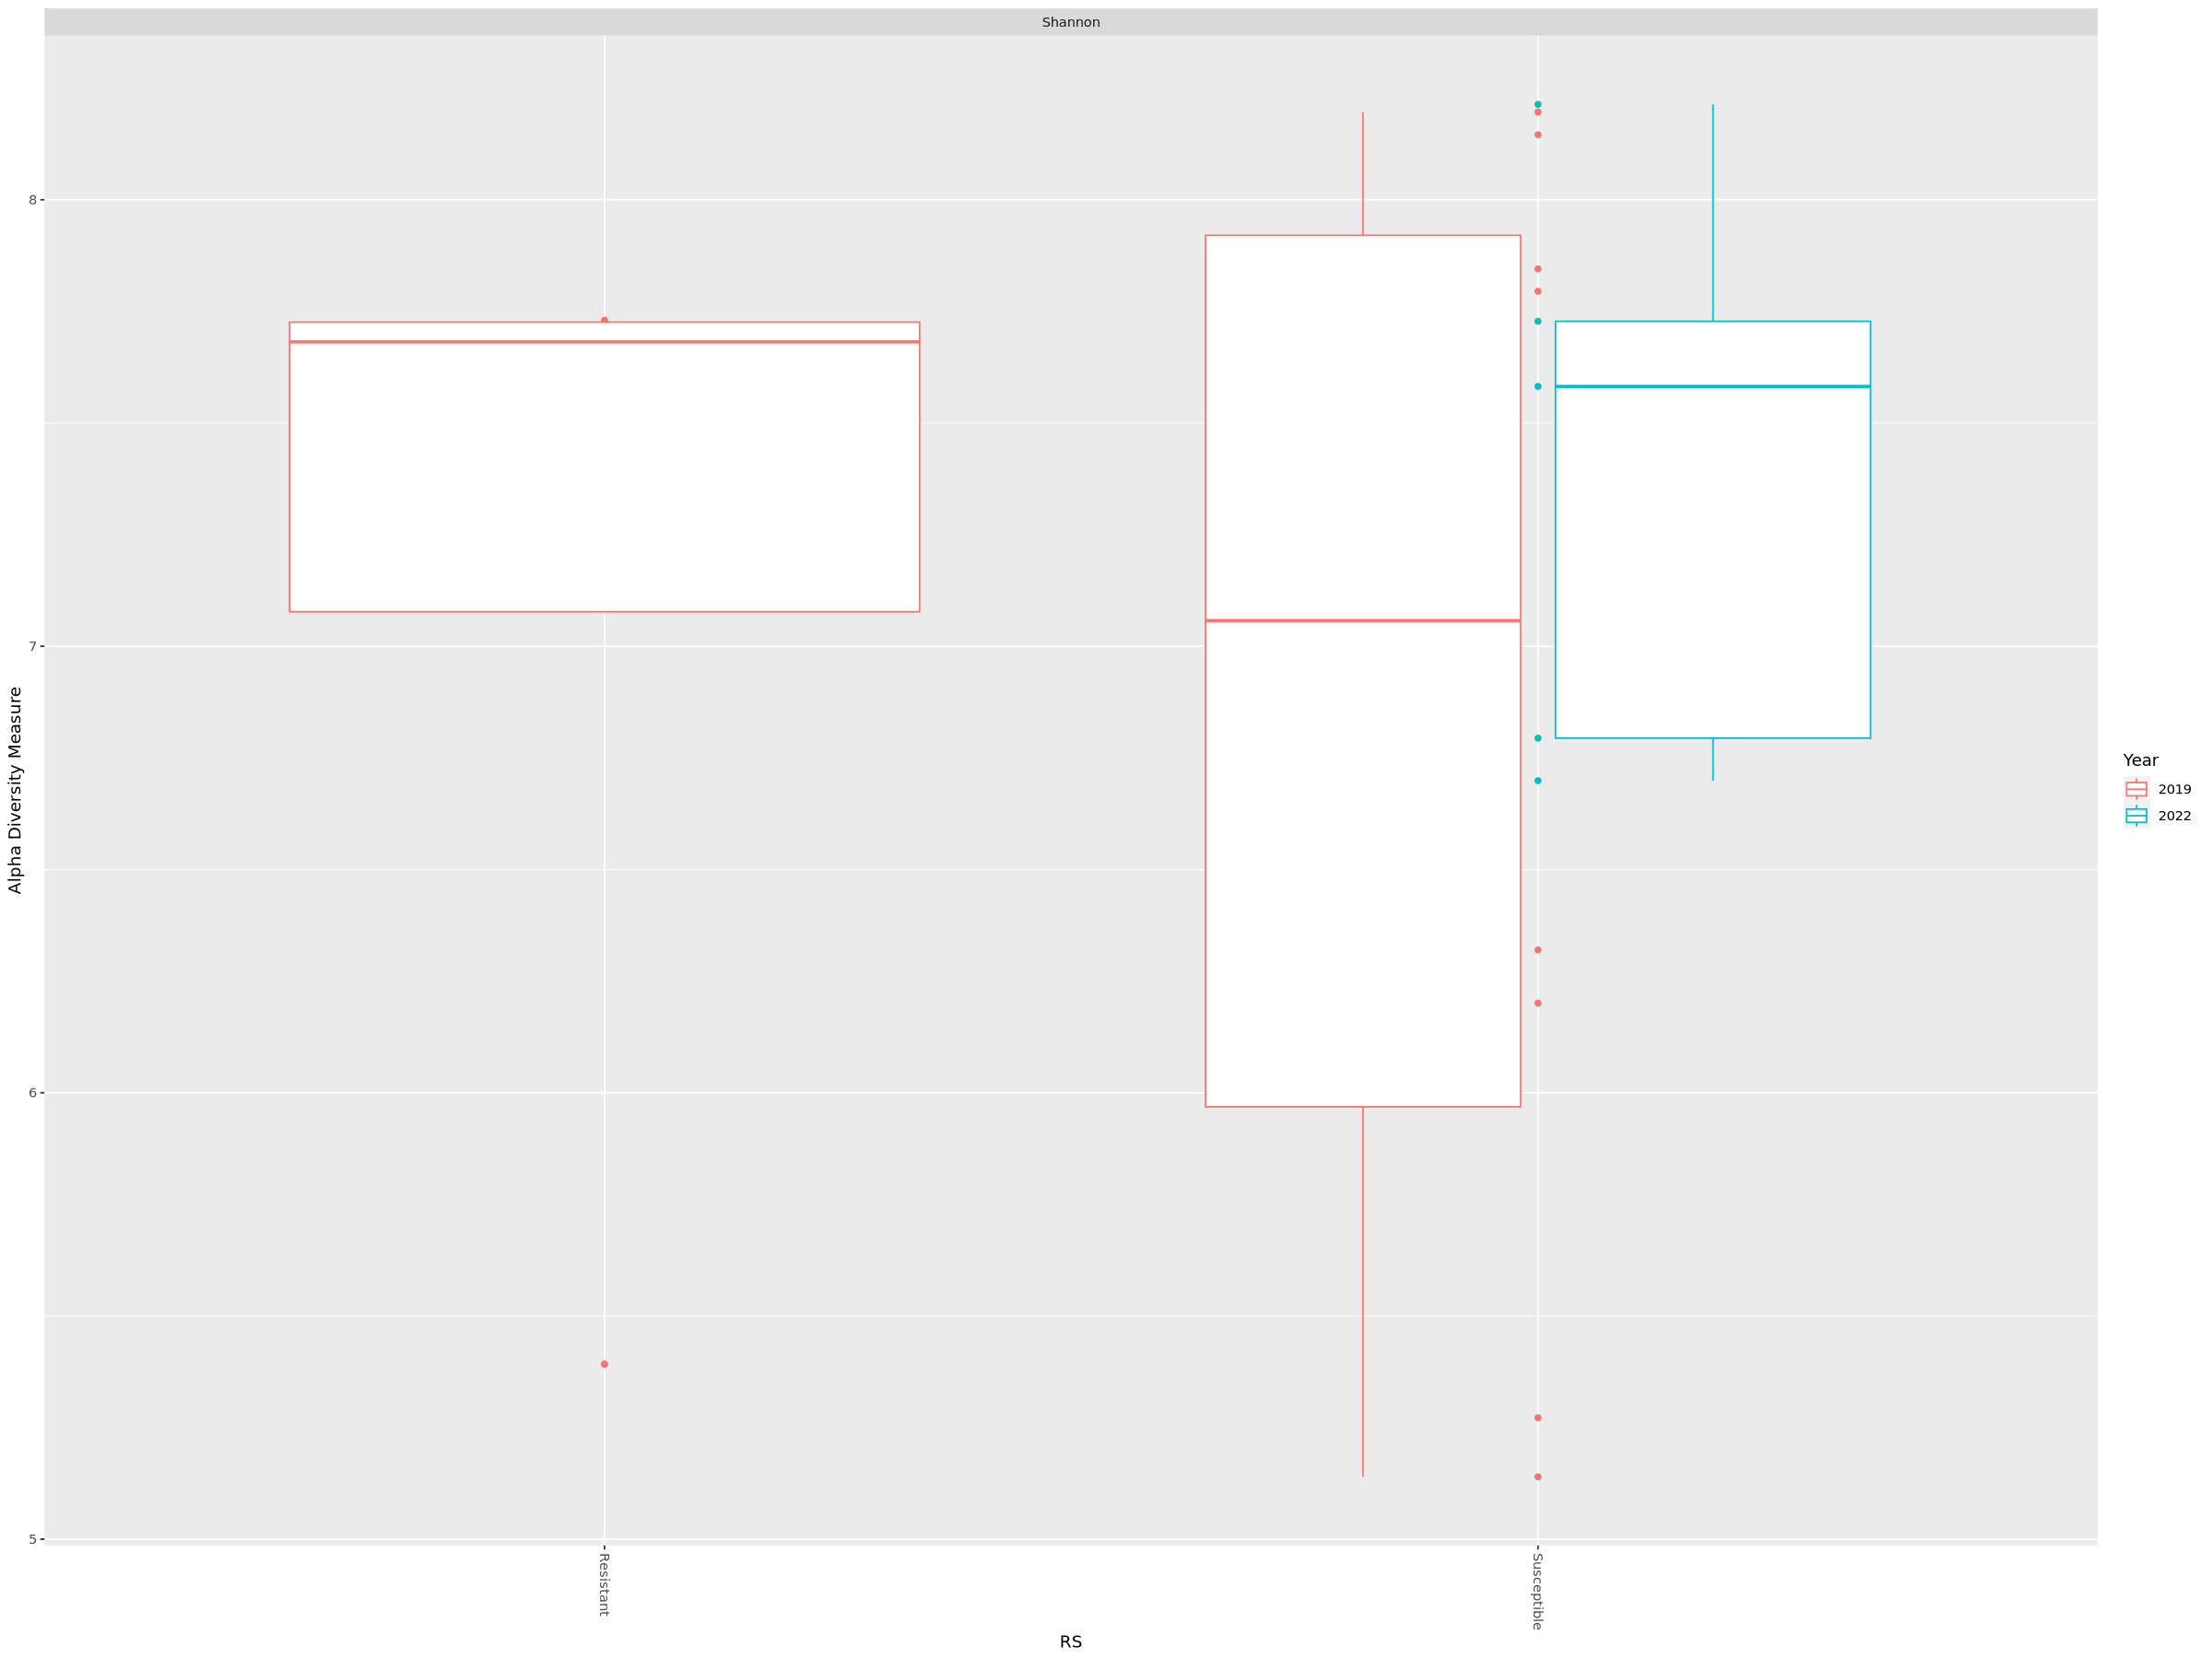

In [138]:
plot_richness(Corals, x="RS", color="Year", measures=c("Shannon")) + geom_boxplot()

In [251]:
year_alpha<-plot_richness(Corals, x="Year", measures=c("Shannon")) + geom_boxplot()

Warning message in estimate_richness(physeq, split = TRUE, measures = measures):
“The data you have provided does not have
any singletons. This is highly suspicious. Results of richness
estimates (for example) are probably unreliable, or wrong, if you have already
trimmed low-abundance taxa from the data.

We recommended that you find the un-trimmed data and retry.”


In [252]:
ggsave(file="alpha_diversity.pdf", plot=year_alpha,width = 15, height=10)

In [115]:
# significance in shannon diversity between R v S
pairwise.wilcox.test(rich$Shannon, sample_data(Corals)$RS)

ERROR: Error in eval(expr, envir, enclos): object 'rich' not found


In [116]:
# DESEQ
if (!require("BiocManager", quietly = TRUE))
    install.packages("BiocManager")

BiocManager::install("DESeq2")


Bioconductor version '3.18' is out-of-date; the current release version '3.19'
  is available with R version '4.4'; see https://bioconductor.org/install

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.r-project.org

Bioconductor version 3.18 (BiocManager 1.30.22), R 4.3.2 (2023-10-31)

Installing package(s) 'DESeq2'

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Old packages: 'ape', 'backports', 'BH', 'BiocManager', 'Biostrings', 'broom',
  'bslib', 'cachem', 'callr', 'codetools', 'curl', 'data.table', 'DBI',
  'dbplyr', 'digest', 'farver', 'fastmap', 'fs', 'GenomeInfoDb', 'ggplot2',
  'glue', 'gtable', 'highr', 'htmltools', 'igraph', 'knitr', 'lattice',
  'locfit', 'matrixStats', 'mgcv', 'munsell', 'openssl', 'pbdZMQ', 'pixmap',
  'processx', 'ps', 'ragg', 'Rcpp', 'RcppArmadillo', 'RCurl', 'readr', 'repr',
  'reprex', '

In [108]:
library("DESeq2")

In [292]:
sample_data(Corals)$Year <- as.factor(sample_data(Corals)$Year)

In [293]:
sample_variables(Corals)

[1] "tagID"                        "Month_year"                  
 [3] "Country"                      "Location"                    
 [5] "CollectionDate"               "Transect.x"                  
 [7] "TransectNum.x"                "OldTagNum.x"                 
 [9] "NewTagNum.x"                  "Species.x"                   
[11] "Time_sampled"                 "Time_processed"              
[13] "Sample_type"                  "SampleNum"                   
[15] "Health_status"                "Sampling_notes"              
[17] "Tubelabel_species"            "Sample_physical_location"    
[19] "Extraction_physical_location" "Date_sequenced"              
[21] "Notes"                        "Year"                        
[23] "X"                            "Date_InitialTag"             
[25] "Transect.y"                   "TransectNum.y"               
[27] "OldTagNum.y"                  "NewTagNum.y"                 
[29] "Species.y"                    "Meter"                       
[31] "Meters_90"                    "Direction"                   
[33] "Size_Class"                   "Notes_June_2019"             
[35] "MaxDiameter"                  "Height"                      
[37] "Date_DocumentedDisease"       "Date_DocumentedMortality"    
[39] "Notes_May2022"                "Sept_2023"                   
[41] "Nov_2023"                     "Dec_2023"                    
[43] "Jan_2024"                     "Feb_2024"                    
[45] "April_2024"                   "X062019_Condition"           
[47] "X062019_Percentage"           "X052022_Condition"           
[49] "X122022_Condition"            "X052023_Condition"           
[51] "X092023_Condition"            "X092023_Percentage"          
[53] "X112023_Condition"            "X112023_Percentage"          
[55] "X122023_Condition"            "X122023_Percentage"          
[57] "X012024_Condition"            "X012024_Percentage"          
[59] "X022024_Condition"            "X022024_Percentage"          
[61] "X042024_Condition"            "X042024_Percentage"          
[63] "COLONIES_TO_LOOK_AT"          "RS"                          
[65] "Date"                         "Transect"                    
[67] "SampleID"

In [294]:
# convert phyloseq to deseq obj 
ds = phyloseq_to_deseq2(Corals, ~ Year)
ds = DESeq(ds)

converting counts to integer mode

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

-- replacing outliers and refitting for 905 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

estimating dispersions

fitting model and testing



In [295]:
# filter otus with a false discovery rate cutoff of 0.01
# return significantly differentially abundant otu b/w R v S
alpha = 0.01
res = results(ds, contrast=c("Year", "2019", "2022"), alpha=alpha)
res = res[order(res$padj, na.last=NA), ]
res_sig = res[(res$padj < alpha), ]
res_sig

log2 fold change (MLE): Year 2019 vs 2022 
Wald test p-value: Year 2019 vs 2022 
DataFrame with 2 rows and 6 columns
                        baseMean log2FoldChange     lfcSE      stat      pvalue
                       <numeric>      <numeric> <numeric> <numeric>   <numeric>
Peduovirus P22H1         106.965        26.6182   3.34826   7.94985 1.86736e-15
Cutibacterium modestum  1724.481        12.7051   2.63444   4.82268 1.41639e-06
                              padj
                         <numeric>
Peduovirus P22H1       2.24774e-11
Cutibacterium modestum 8.52452e-03

In [298]:
ggplot(res_sig) + geom_point(size=6) + 
  theme(axis.text.x = element_text(angle = -90, hjust = 0, vjust=0.5))

ERROR: [1m[33mError[39m in `fortify()`:[22m
[1m[22m[33m![39m `data` must be a [34m<data.frame>[39m, or an object coercible by `fortify()`,
  not a <DESeqResults> object.


In [296]:
# plot significantly different OTUs
res_sig = cbind(as(res_sig, "data.frame"), as(tax_table(Corals)[rownames(res_sig), ], "matrix"))
ggplot(res_sig, aes(x=Genus, y=log2FoldChange, color=Genus)) +
    #geom_jitter(size=3, width = 0.2) +
    theme(axis.text.x = element_text(angle = -90, hjust = 0, vjust=0.5))

ERROR: Error in access(object, "tax_table", errorIfNULL): tax_table slot is empty.


In [ ]:
plot_bar(Corals)+
facet_grid(.~RS, scales="free_x", space="free")+
geom_bar(aes(color="Genus", fill="Genus"), stat="identity", position="stack")+
theme_bw()+
theme(legend.position="right", panel.border = element_blank(), 
          panel.grid.major.x = element_blank(), 
          panel.grid.minor.x = element_blank(),
          axis.ticks.x=element_blank(), axis.line=element_line(color="black"), axis.text=element_text(angle=90),
          text = element_text(size=20))

In [ ]:
# run plotbar on phyloseq obj

In [ ]:
plot_bar(Corals, fill= "Genus")

In [ ]:
data("GlobalPatterns")
gp.ch = subset_taxa(GlobalPatterns, Phylum == "Chlamydiae")


In [ ]:
plot_bar(Corals)+
facet_grid(.~RS, scales="free_x", space="free")+
geom_bar(aes(color=ta1, fill=ta1), stat="identity", position="stack")+
theme_bw()+
theme(legend.position="right", panel.border = element_blank(), 
          panel.grid.major.x = element_blank(), 
          panel.grid.minor.x = element_blank(),
          axis.ticks.x=element_blank(), axis.line=element_line(color="black"), axis.text=element_text(angle=90),
          text = element_text(size=20))

In [ ]:
#Example: 
DE17_100 = prune_taxa(names(sort(taxa_sums(DE17),TRUE)[1:100]), DE17)
plot_bar(DE17_100, fill="Family")+
theme_bw()+
scale_fill_manual(values=mycolors)+
theme(legend.position = "right", text = element_text(size=18), axis.text.x = element_blank())+
facet_grid(.~Site, scales="free_x")

In [ ]:
plot_bar(Corals,  fill="ta1") +
geom_bar(aes(color="ta1", fill="ta1"), stat="identity", position="stack")+
theme_bw()+
theme(axis.text.x = element_text(angle = 90))

In [ ]:
plot_bar(Corals, fill=OTU)+
theme_bw()+
theme(legend.position = "right", text = element_text(size=18), axis.text.x = element_blank())+
facet_grid(.~RS, scales="free_x")

#### Trying something other than phyloseq

In [ ]:
#install.packages("reshape2")
library(ggplot2)
library(reshape2)

In [ ]:
# keep top 100 otus
otus_sorted <- otu_table[1:100, ]
dim(otus_sorted)

In [ ]:
otu_t <- t(otus_sorted)
head(otu_t)

In [ ]:
rownames=rownames(otu_t)
rownames

In [ ]:

pcm = melt(otus_sorted, id=rownames)
pcm

In [ ]:
colnames(pcm)=c("otu","sample","count")

In [ ]:
#make the plot!
mx = ggplot(pcm, aes(x = sample, fill = otu, y = count)) + 
    geom_bar(stat = "identity", colour = "black") + 
    theme(axis.text.x = element_text(angle = 90, size = 14, colour = "black", vjust = 0.5, hjust = 1, face= "bold"), 
    axis.title.y = element_text(size = 16, face = "bold"), legend.title = element_text(size = 16, face = "bold"), 
    legend.text = element_text(size = 12, face = "bold", colour = "black"), 
    axis.text.y = element_text(colour = "black", size = 12, face = "bold")) + 
    scale_y_continuous(expand = c(0,0)) + 
    labs(x = "", y = "Relative Abundance (%)", fill = "OTU") + 
    scale_fill_manual(values = colours)
    
mx

In [ ]:
ggplot(pcm, aes(x = sample, fill = otu, y = count))+ 
    geom_bar(stat = "identity", colour = "black") 